## Section 2. Data Understanding
### 2.1 Dataset Information

In [1]:
import os
import warnings
from pathlib import Path

# Suppress all warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import spearmanr, normaltest, mannwhitneyu, kruskal

# Pandas display settings
pd.set_option("display.max_columns", None)

# Seaborn aesthetics
sns.set_theme()

# File path
data_path = Path("../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Load dataset
if data_path.exists():
    real_df = pd.read_csv(data_path)
    df = real_df.copy()
    print(df.info())
    display(df.head())
else:
    print(f"File not found: {data_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Missing Values Checking

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


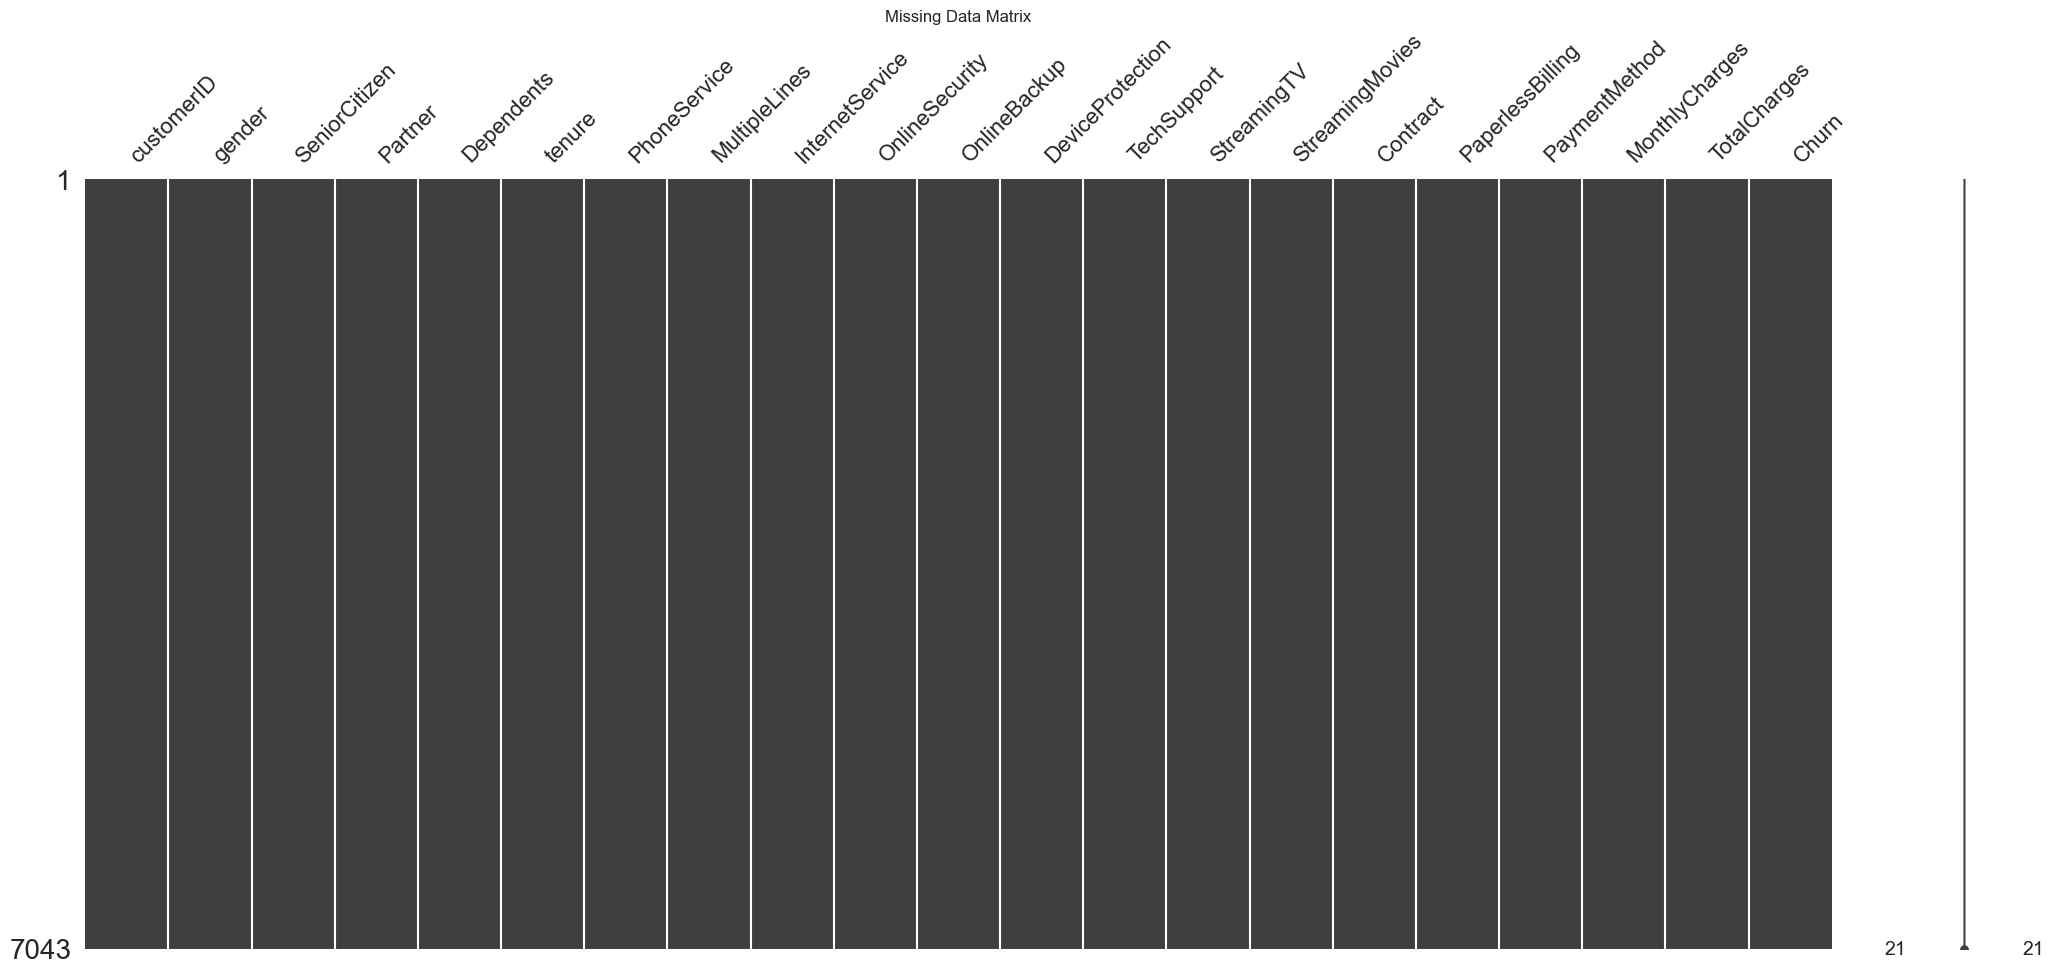

In [2]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

Meskipun tidak terdapat missing values secara eksplisit dalam dataset, keberadaan nilai `tenure = 0` perlu diperhatikan karena dapat merepresentasikan pelanggan yang baru mendaftar dan belum benar-benar aktif, atau langsung churn pada bulan pertama. Hal ini penting karena bisa mempengaruhi kualitas data dan performa model machine learning, terutama jika jumlahnya kecil namun berdampak besar dalam proses pembelajaran model. Dari sisi bisnis, pelanggan dengan `tenure = 0` mungkin belum sempat menggunakan layanan secara penuh, sehingga berpotensi mencerminkan signup palsu atau pembatalan instan. Oleh karena itu, baris dengan nilai ini sebaiknya dianalisis lebih lanjut, dipertimbangkan untuk dipisahkan, atau bahkan dibuang jika tidak relevan.

In [3]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dari tabel yang ditampilkan, terlihat bahwa seluruh baris dengan `tenure = 0` memiliki nilai `TotalCharges` yang kosong (missing). Ini memperkuat indikasi adanya **anomali data**, karena secara logika bisnis, jika seorang pelanggan sudah memiliki `MonthlyCharges` tetapi `TotalCharges` kosong, hal ini tidak konsisten. Seharusnya, meskipun pelanggan baru, `TotalCharges` minimal setara dengan `MonthlyCharges` jika telah berjalan satu bulan. Selain itu, sebagian besar pelanggan ini memiliki kontrak jangka panjang seperti "Two year", yang tidak wajar jika langsung berstatus tenure = 0 tanpa adanya tagihan. Temuan ini menunjukkan bahwa baris-baris tersebut kemungkinan merupakan data yang belum tereksekusi penuh dalam sistem atau input yang belum lengkap. Maka, penting untuk memperlakukan baris ini secara khusus—baik dengan membersihkan, memisahkan, atau mengecualikan dari pelatihan model tergantung pada tujuan analisisnya.


In [4]:
df = df[df['tenure'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Terdapat anomali pada data dengan tenure = 0, di mana nilai TotalCharges tidak terisi. Hal ini wajar karena pelanggan tersebut baru bergabung sehingga belum memiliki tagihan dan status churn-nya belum dapat diketahui dengan jelas. Sesuai kesepakatan, 11 baris dengan tenure = 0 dihapus dari dataset karena dianggap tidak merepresentasikan perilaku pelanggan aktif. Data ini hanya mencakup sekitar 0.15% dari total, sehingga dampaknya terhadap analisis sangat kecil.

### 2.3 Duplicated Values Checking

In [5]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Hasil pemeriksaan duplikasi dengan fungsi `df.duplicated().sum()` menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik setelah penghapusan baris dengan `tenure = 0`, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi. Keberadaan data yang bebas duplikasi sangat penting untuk menjaga kualitas analisis dan mencegah bias yang dapat muncul pada tahap pelatihan model machine learning.

### 2.4 Dataset Restructuring for Better EDA

In [6]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = [col for col in object_cols if col not in ('customerID', 'TotalCharges')]
df[object_cols] = df[object_cols].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Untuk menyederhanakan analisis dan mengoptimalkan penggunaan memori, seluruh kolom bertipe `object`—kecuali `customerID` dan `TotalCharges`—diubah menjadi tipe data `category`, karena kolom-kolom ini merepresentasikan data kategorikal. Selain itu, kolom `SeniorCitizen`, yang semula berupa numerik biner (0 dan 1), dipetakan menjadi kategori `"No"` dan `"Yes"` untuk meningkatkan interpretabilitas. Kolom `TotalCharges` juga dikonversi ke tipe numerik (`float64`) dengan `errors='coerce'` untuk memastikan konsistensi data. Setelah transformasi, dataset terdiri dari 21 kolom dengan 17 kolom bertipe kategori, 2 numerik kontinu (`MonthlyCharges`, `TotalCharges`), 1 numerik diskrit (`tenure`), dan 1 kolom identitas (`customerID`). Transformasi ini berhasil memperbaiki struktur data untuk keperluan analisis eksploratif dan pemodelan lebih lanjut.

### 2.5 Exploratory Data Analysis (EDA) - Univariat

In [8]:
def plot_box_and_kde(df, col, figsize=(15, 5)):
    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col}', fontsize=16, y=1.02)
    sns.boxplot(data=df, x=col, orient='h', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.kdeplot(data=df, x=col, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE Histplot of {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

    # Statistik deskriptif + IQR
    stats = df[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tabel transpos
    stats_df = stats.to_frame(name=col).T
    display(stats_df)

Fungsi plot_box_and_kde digunakan untuk menganalisis variabel numerik seperti 'tenure'. Fungsi ini menyajikan dua plot berdampingan: sebuah boxplot untuk melihat ringkasan statistik (median, kuartil, jangkauan) dan sebuah KDE plot untuk melihat bentuk distribusi data. Selain visualisasi, fungsi ini juga menampilkan tabel statistik deskriptif yang mencakup mean, standar deviasi, dan IQR (Interquartile Range) untuk memberikan ringkasan kuantitatif.

In [9]:
def plot_countplot_with_hue(df, col, figsize=(15, 5)):
    # Hitung Count dan Persentase
    counts = df[col].value_counts()
    percentages = counts / len(df) * 100
    total = len(df)

    # Buat urutan berdasarkan Count tertinggi ke terendah
    ordered_categories = counts.index.tolist()
    df[col] = pd.Categorical(df[col], categories=ordered_categories, ordered=True)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, y=col, hue=col)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('')

    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        label = f'{int(width)} ({width / total:.1%})'
        ax.text(width + total * 0.005, y, label, va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Tampilkan tabel count dan persentase (dengan reset index)
    table = pd.DataFrame({
        col: counts.index,
        'Count': counts.values,
        'Percentage': percentages.apply(lambda x: f'{x:.1f}%').values
    }).reset_index(drop=True)

    display(table)

Untuk variabel kategorikal, fungsi plot_countplot_with_hue digunakan. Fungsi ini menghitung frekuensi setiap kategori, mengurutkannya dari yang terbesar, lalu menampilkannya dalam bentuk countplot horizontal. Setiap bar pada plot diberi anotasi yang menunjukkan jumlah absolut dan persentase relatifnya, sehingga memberikan gambaran distribusi yang jelas dan informatif.

In [10]:
def check_normality(df, col):
  # Ambil data dari kolom yang ditentukan dan hapus nilai yang hilang.
  data_to_test = df[col].dropna()

  # Jalankan uji D'Agostino-Pearson dan ambil p-value.
  statistic, p_value = normaltest(data_to_test)
  
  # Tampilkan nilai p-value-nya.
  print(f"P-value untuk kolom '{col}': {p_value:.2f}")

  # Cek p-value untuk mencetak konklusi hipotesis.
  if p_value < 0.05:
    print(f"Tolak Ho, terima Ha. Data '{col}' tidak terdistribusi normal.")
  else:
    print(f"Gagal tolak Ho. Data '{col}' terdistribusi normal.")

Fungsi ini bertujuan untuk menguji secara statistik Bagaimanakah data dalam sebuah kolom mengikuti distribusi normal atau tidak. Ia mengambil data dari kolom yang ditentukan, menjalankan uji normalitas D'Agostino-Pearson, lalu mencetak nilai p-value yang dihasilkan. Berdasarkan p-value tersebut, fungsi ini memberikan kesimpulan statistik Bagaimanakah kita harus menolak atau gagal menolak hipotesis nol, yang pada akhirnya menentukan Bagaimanakah data tersebut dianggap normal atau tidak.
- Ho: Data terdistribusi normal.
- Ha: Data tidak terdistribusi normal.

#### 2.5.1 Berapa lama pelanggan biasanya tetap berlangganan layanan?

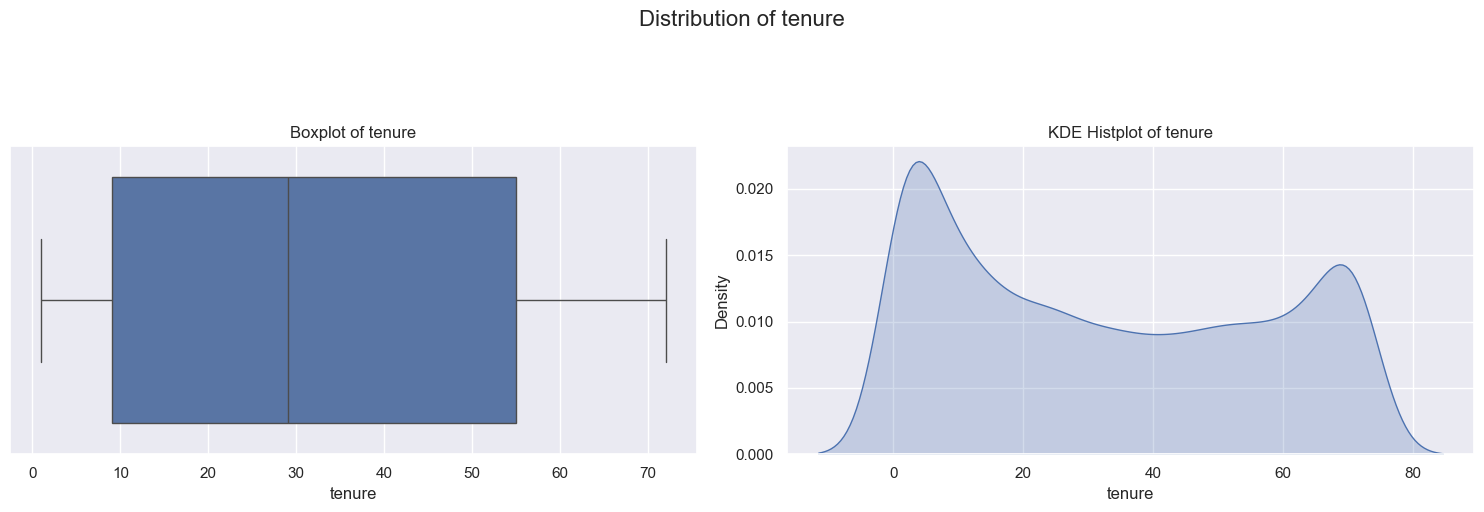

,count,mean,std,min,25%,50%,75%,max,IQR
tenure,7032.0,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0,46.0


P-value untuk kolom 'tenure': 0.00
Tolak Ho, terima Ha. Data 'tenure' tidak terdistribusi normal.


In [11]:
plot_box_and_kde(df, 'tenure')
check_normality(df,'tenure')

##### Business Insights

- Sebagian besar pelanggan memiliki lama berlangganan di bawah 3 tahun, dengan nilai tengah 29 bulan dan rata-rata 32 bulan. Hal ini menunjukkan pentingnya fokus pada retensi jangka menengah untuk menjaga basis pelanggan tetap stabil.

- Sebanyak 25% pelanggan berhenti dalam 9 bulan pertama, dan 75% pelanggan berhenti sebelum bulan ke-55. Fakta ini menunjukkan bahwa risiko churn terbesar terjadi di awal masa langganan.

- Distribusi lama berlangganan menunjukkan dua puncak, yaitu pada masa awal dan mendekati 72 bulan. Ini menandakan adanya dua kelompok dominan: pelanggan yang cepat berhenti dan pelanggan sangat loyal.

#### 2.5.2 Berapa besar total pengeluaran pelanggan selama mereka berlangganan?

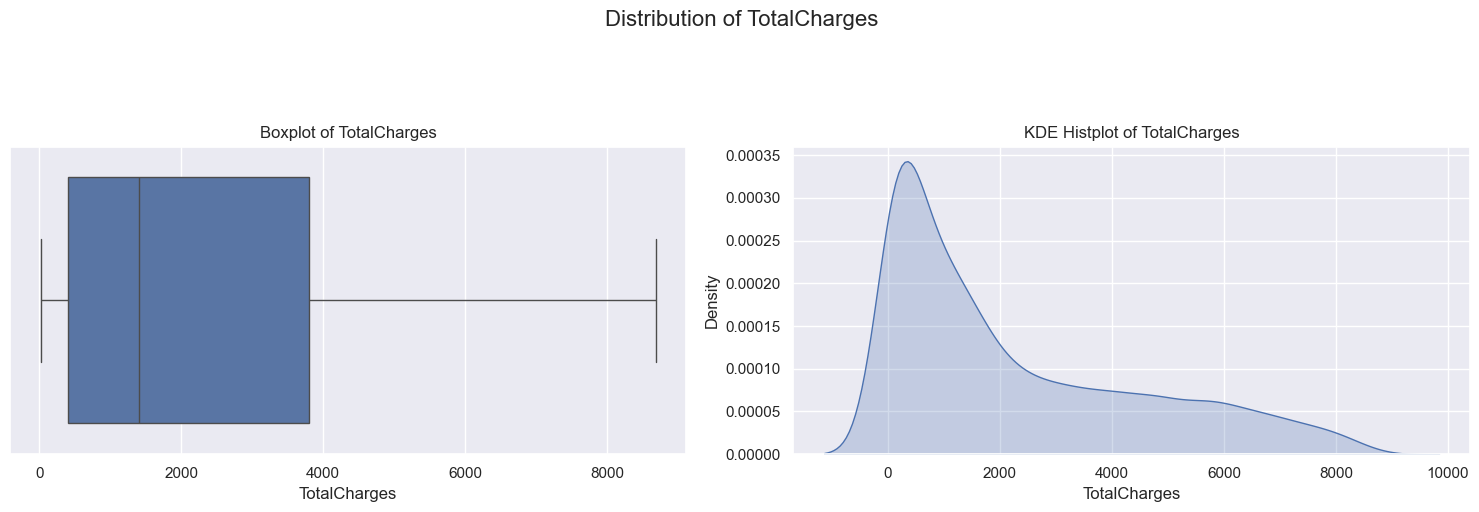

,count,mean,std,min,25%,50%,75%,max,IQR
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8,3393.2875


P-value untuk kolom 'TotalCharges': 0.00
Tolak Ho, terima Ha. Data 'TotalCharges' tidak terdistribusi normal.


In [12]:
plot_box_and_kde(df, 'TotalCharges')
check_normality(df, 'TotalCharges')

##### Business Insights

- Sebagian besar pelanggan memiliki total pengeluaran yang relatif rendah, dengan nilai tengah sebesar $1.397 dan hanya 25% pelanggan yang membayar lebih dari $3.794. Hal ini menunjukkan bahwa sebagian besar pelanggan belum menghasilkan nilai jangka panjang yang tinggi bagi perusahaan.

- Rata-rata total pengeluaran pelanggan adalah sekitar $2.283, namun sebaran sangat condong ke kanan hingga maksimum $8.684. Ini mengindikasikan adanya kelompok kecil pelanggan bernilai tinggi yang memberikan kontribusi signifikan terhadap pendapatan.

- IQR yang besar (±$3.393) menunjukkan variasi yang tinggi dalam nilai pelanggan. Artinya, kontribusi finansial dari setiap pelanggan sangat berbeda-beda.

#### 2.5.3 Berapa biaya bulanan yang biasanya dibayarkan pelanggan?

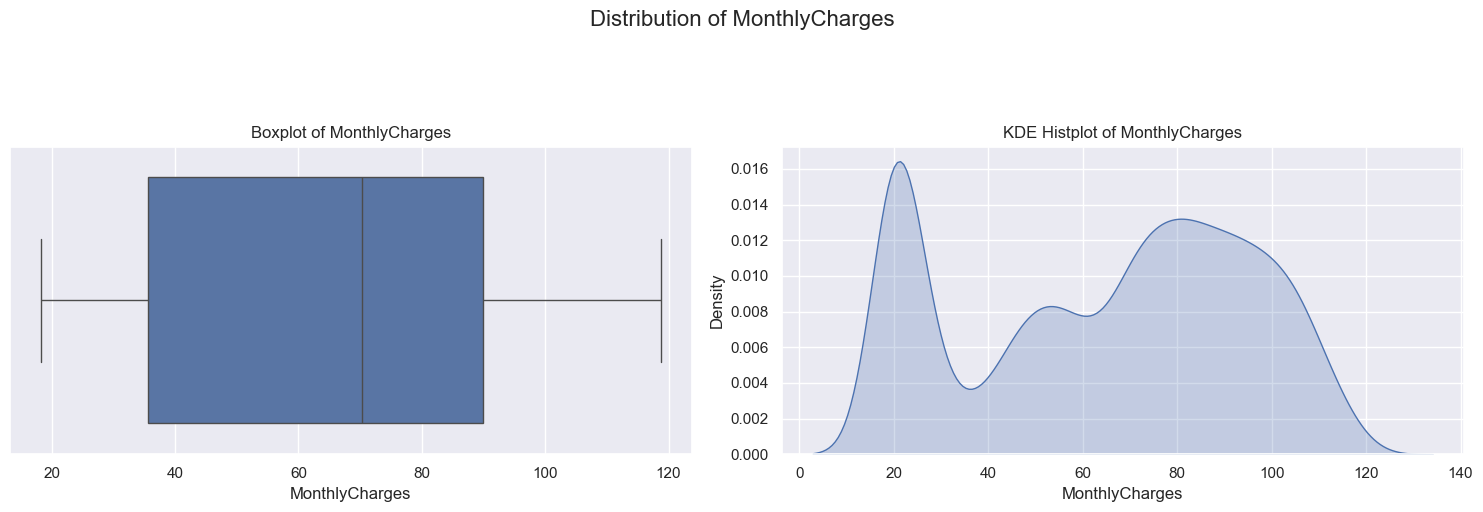

,count,mean,std,min,25%,50%,75%,max,IQR
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75,54.275


P-value untuk kolom 'MonthlyCharges': 0.00
Tolak Ho, terima Ha. Data 'MonthlyCharges' tidak terdistribusi normal.


In [13]:
plot_box_and_kde(df, 'MonthlyCharges')
check_normality(df, 'MonthlyCharges')

##### Business Insights

- Nilai tengah tagihan bulanan pelanggan adalah sekitar $70, dengan rata-rata sebesar $65. Ini menunjukkan bahwa sebagian besar pelanggan berada pada level harga menengah ke atas.

- Sebaran biaya bulanan bersifat bimodal, dengan konsentrasi pelanggan pada rentang harga rendah dan tinggi. Hal ini menunjukkan adanya dua kelompok utama pelanggan berdasarkan jenis layanan yang dipilih.

- IQR yang cukup besar ($54) menunjukkan variasi signifikan dalam struktur biaya antar pelanggan. Artinya, pelanggan membayar biaya yang sangat berbeda tergantung pada jenis dan kombinasi layanan yang diambil.

#### 2.5.4 Bagaimana distribusi status churn pelanggan?

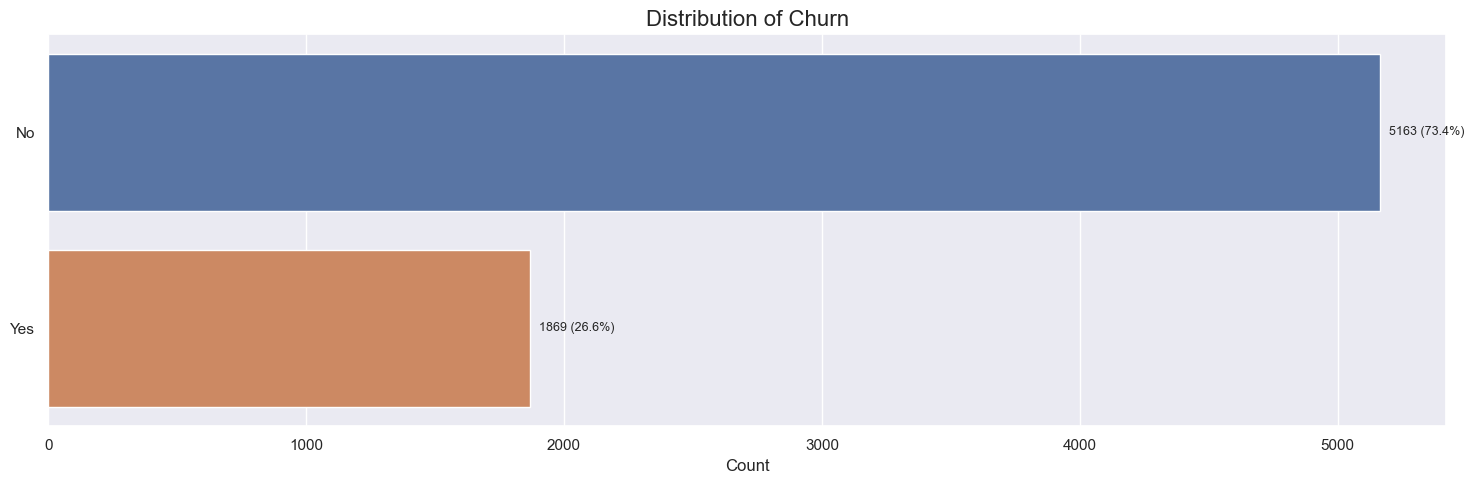

,Churn,Count,Percentage
0,No,5163,73.4%
1,Yes,1869,26.6%


In [14]:
plot_countplot_with_hue(df, 'Churn')

##### Business Insights

- Sebanyak 26,6% pelanggan dalam dataset berhenti berlangganan (churn), sementara 73,4% masih aktif. Ini menunjukkan bahwa meskipun mayoritas pelanggan tetap bertahan, proporsi churn tetap signifikan dan tidak bisa diabaikan.

- Dataset bersifat tidak seimbang, dengan jumlah pelanggan yang tidak churn hampir tiga kali lebih banyak dibandingkan yang churn. Hal ini perlu diperhatikan dalam analisis lebih lanjut maupun pengembangan model prediktif.

#### 2.5.5 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kelamin?

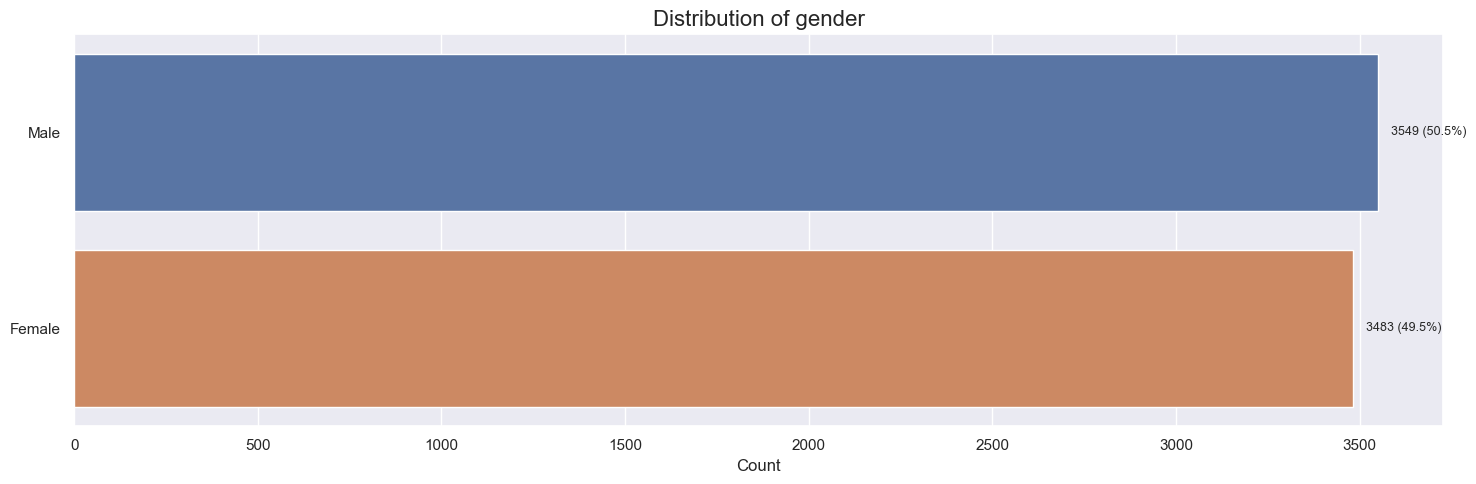

,gender,Count,Percentage
0,Male,3549,50.5%
1,Female,3483,49.5%


In [15]:
plot_countplot_with_hue(df, 'gender')

##### Business Insights

- Distribusi pelanggan berdasarkan gender sangat seimbang, dengan 50,5% laki-laki dan 49,5% perempuan. Tidak ada dominasi gender tertentu dalam populasi pelanggan.

#### 2.5.6 Bagaimana karakteristik distribusi pelanggan berdasarkan status lansia?

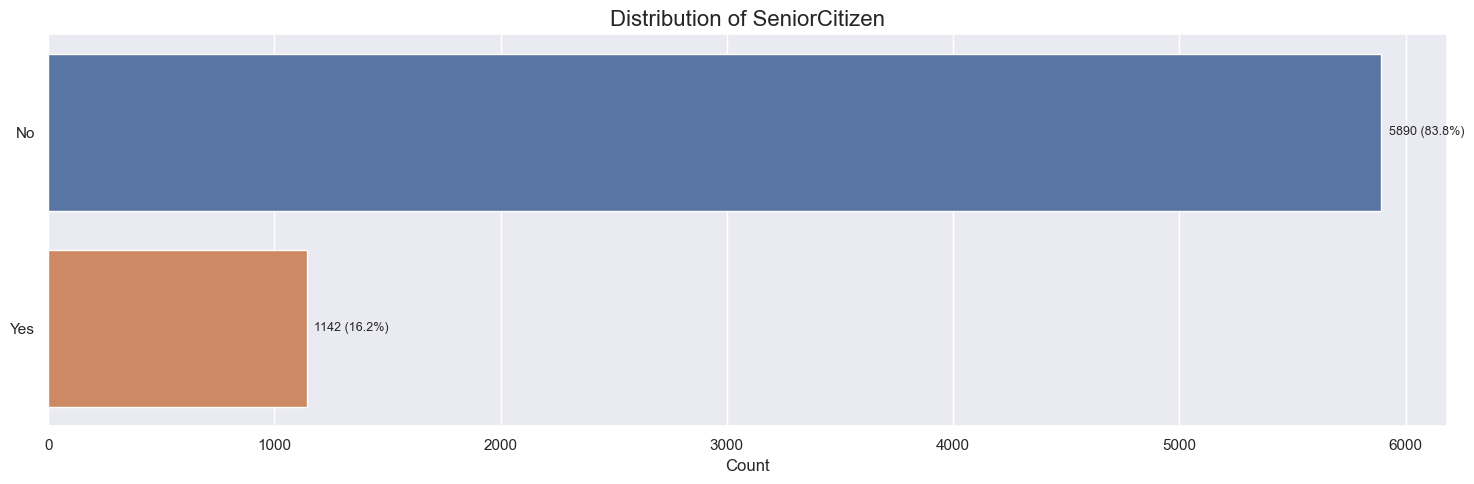

,SeniorCitizen,Count,Percentage
0,No,5890,83.8%
1,Yes,1142,16.2%


In [16]:
plot_countplot_with_hue(df, 'SeniorCitizen')

##### Business Insights

- Sebagian besar pelanggan (83,8%) bukan merupakan warga senior, sementara hanya 16,2% yang termasuk kategori senior. Artinya, kelompok senior merupakan minoritas dalam basis pelanggan saat ini.

#### 2.5.7 Bagaimana karakteristik distribusi pelanggan berdasarkan status memiliki pasangan?

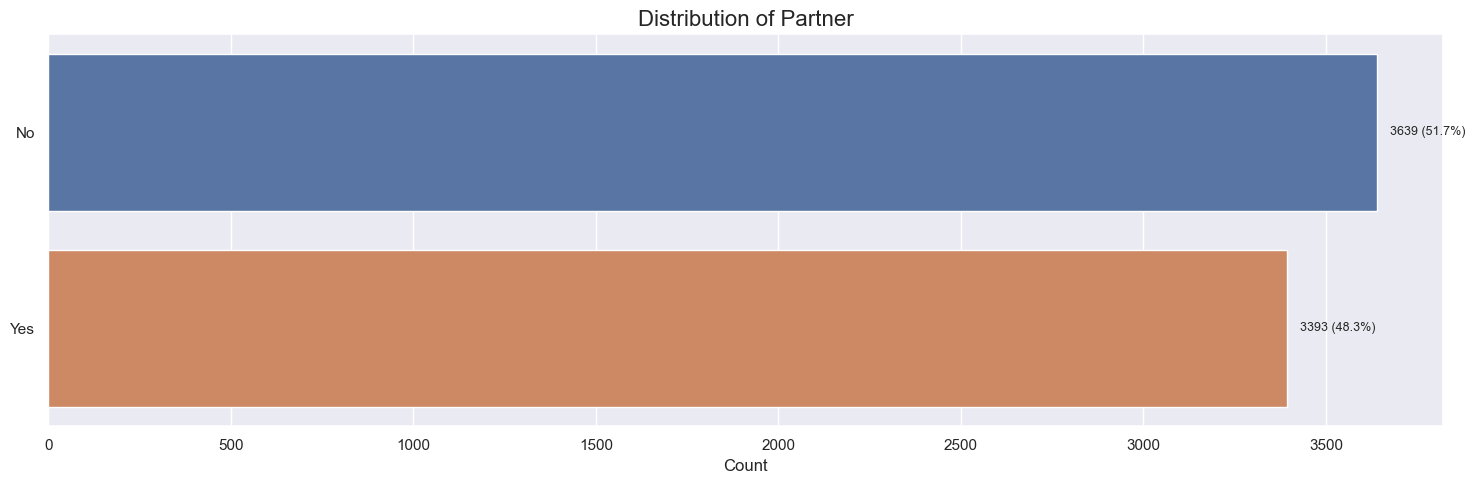

,Partner,Count,Percentage
0,No,3639,51.7%
1,Yes,3393,48.3%


In [17]:
plot_countplot_with_hue(df, 'Partner')

##### Business Insights

- Distribusi pelanggan berdasarkan status memiliki pasangan cukup seimbang, dengan 51,7% tidak memiliki pasangan dan 48,3% memiliki pasangan. Tidak ada dominasi dari salah satu kelompok.

#### 2.5.8 Bagaimana karakteristik distribusi pelanggan berdasarkan tanggungan keluarga?

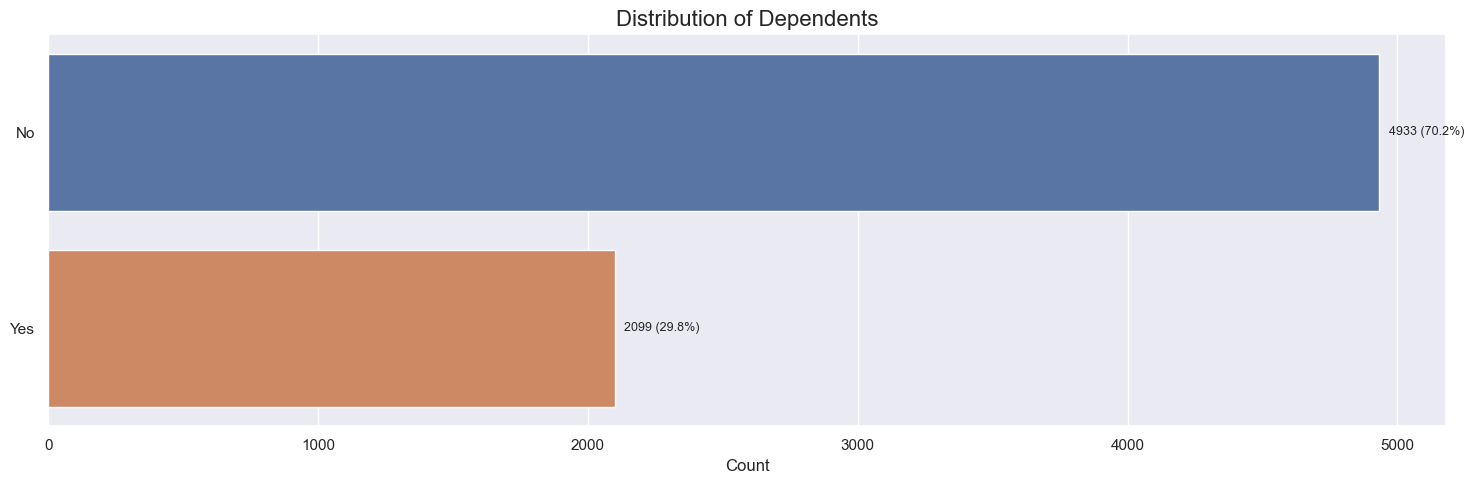

,Dependents,Count,Percentage
0,No,4933,70.2%
1,Yes,2099,29.8%


In [18]:
plot_countplot_with_hue(df, 'Dependents')

##### Business Insights

- Sebagian besar pelanggan (70,2%) tidak memiliki tanggungan, sementara hanya 29,8% yang memiliki tanggungan. Artinya, mayoritas pelanggan merupakan individu tanpa ketergantungan keluarga langsung.

#### 2.5.9 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan layanan telepon ?

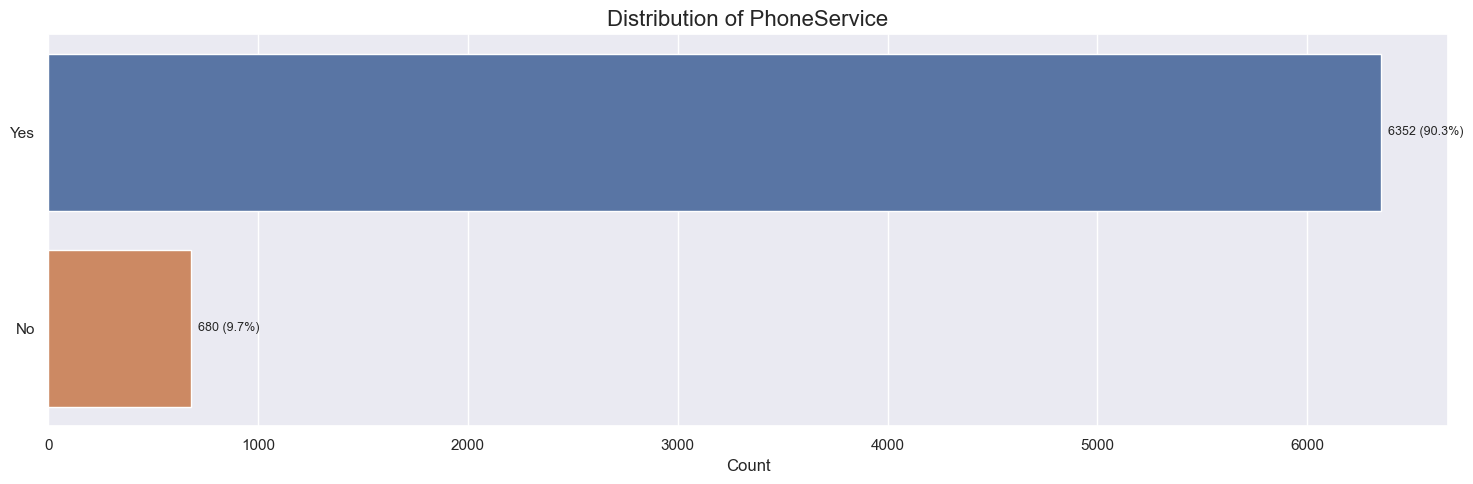

,PhoneService,Count,Percentage
0,Yes,6352,90.3%
1,No,680,9.7%


In [19]:
plot_countplot_with_hue(df, 'PhoneService')

##### Business Insights

- Sebagian besar pelanggan (90,3%) menggunakan layanan telepon, sementara hanya 9,7% yang tidak. Ini menunjukkan bahwa layanan telepon merupakan fitur yang sangat umum di antara pelanggan.

#### 2.5.10 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan beberapa saluran telepon?

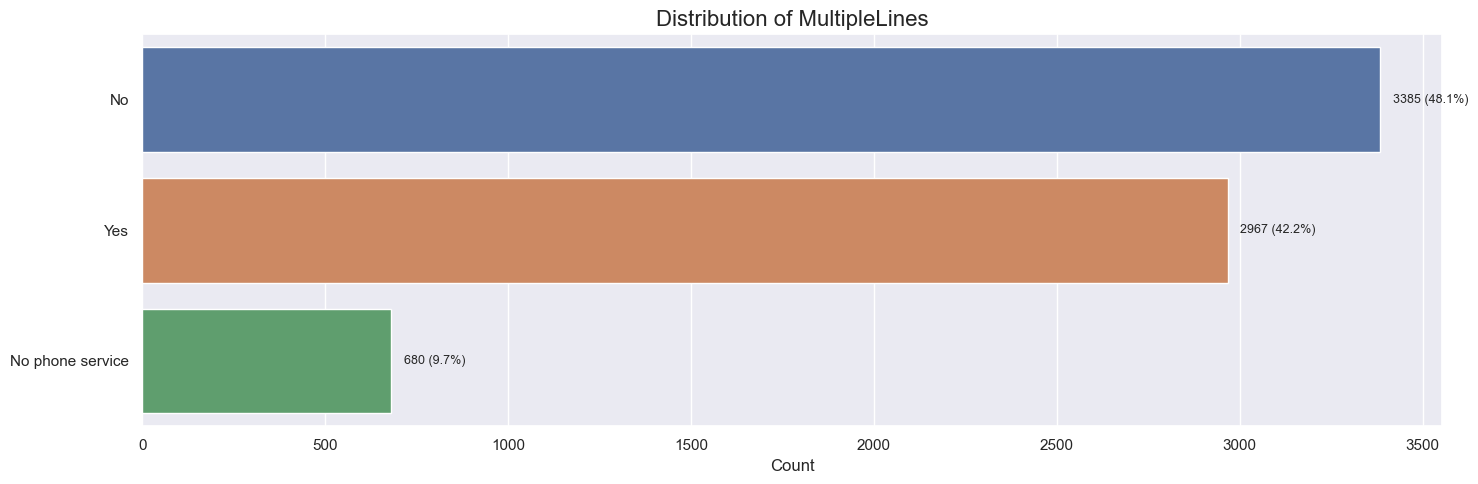

,MultipleLines,Count,Percentage
0,No,3385,48.1%
1,Yes,2967,42.2%
2,No phone service,680,9.7%


In [20]:
plot_countplot_with_hue(df, 'MultipleLines')

##### Business Insights

- Sebanyak 48,1% pelanggan memiliki satu jalur telepon, 42,2% memiliki lebih dari satu jalur, dan 9,7% tidak menggunakan layanan telepon sama sekali. Ini menunjukkan bahwa layanan tambahan berupa saluran telepon ganda cukup diminati oleh hampir separuh pengguna layanan telepon.

#### 2.5.11 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis layanan internet?

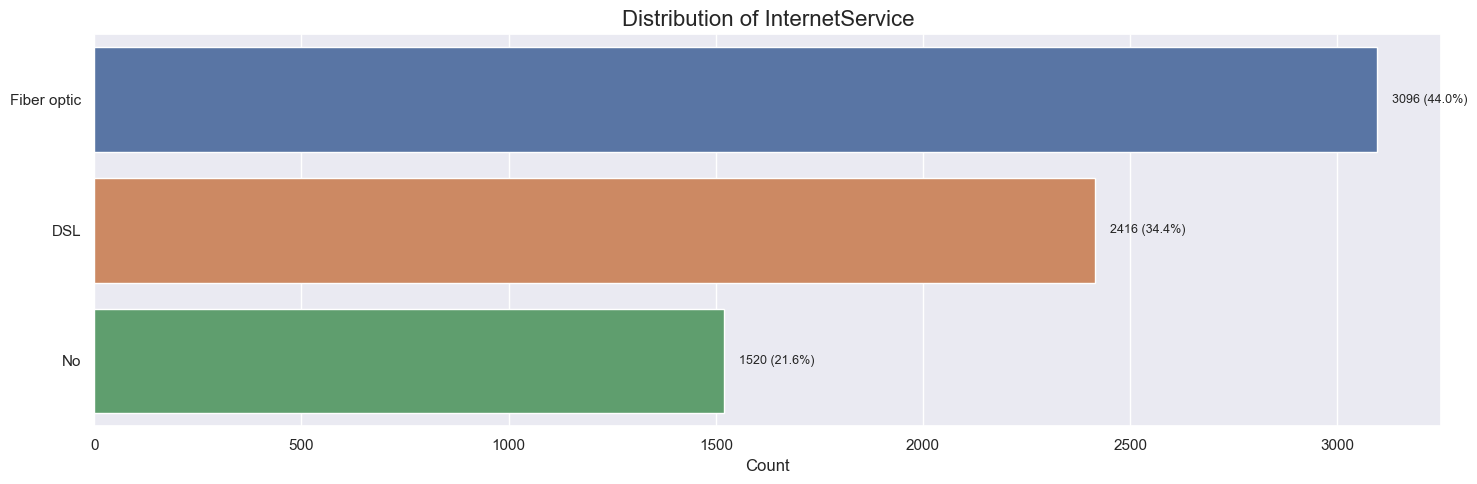

,InternetService,Count,Percentage
0,Fiber optic,3096,44.0%
1,DSL,2416,34.4%
2,No,1520,21.6%


In [21]:
plot_countplot_with_hue(df, 'InternetService')

##### Business Insights

- Sebagian besar pelanggan menggunakan layanan internet, dengan 44,0% memilih Fiber optic dan 34,4% menggunakan DSL. Hanya 21,6% yang tidak berlangganan internet. Ini menunjukkan bahwa layanan internet adalah produk utama dalam portofolio perusahaan.

#### 2.5.12 Bagaimana karakteristik distribusi pelanggan berdasarkan status perlindungan keamanan online?

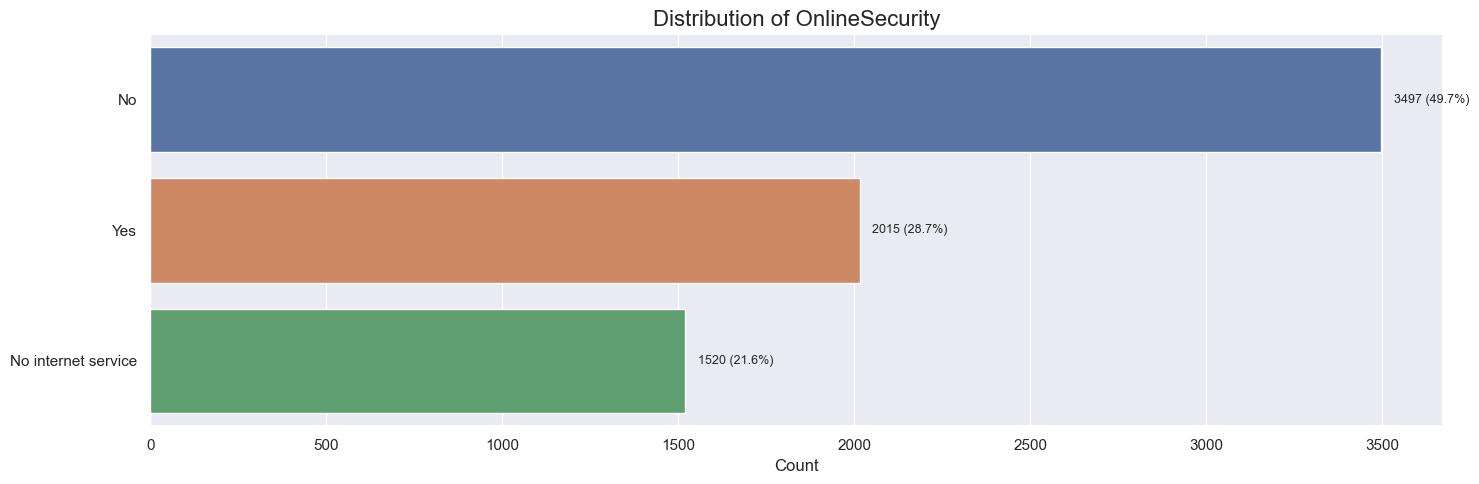

,OnlineSecurity,Count,Percentage
0,No,3497,49.7%
1,Yes,2015,28.7%
2,No internet service,1520,21.6%


In [22]:
plot_countplot_with_hue(df, 'OnlineSecurity')

##### Business Insights

- Sebanyak 49,7% pelanggan tidak menggunakan layanan Online Security, sementara hanya 28,7% yang menggunakannya. Sisanya 21,6% tidak memiliki layanan internet. Artinya, dari pelanggan internet aktif, mayoritas tidak memanfaatkan layanan keamanan online.

#### 2.5.13 Bagaimana karakteristik distribusi pelanggan berdasarkan status cadangan data online?

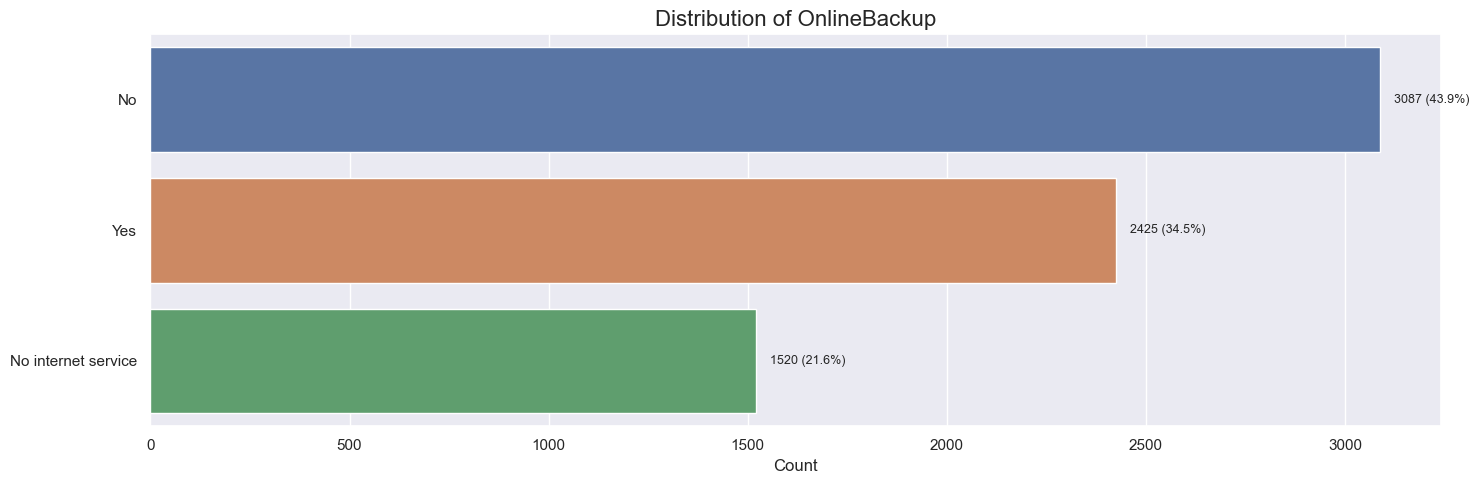

,OnlineBackup,Count,Percentage
0,No,3087,43.9%
1,Yes,2425,34.5%
2,No internet service,1520,21.6%


In [23]:
plot_countplot_with_hue(df, 'OnlineBackup')

##### Business Insights

- Sebanyak 43,9% pelanggan tidak menggunakan layanan Online Backup, dan hanya 34,5% yang menggunakannya, sementara 21,6% tidak memiliki layanan internet. Artinya, mayoritas pelanggan internet tidak memanfaatkan layanan backup daring yang tersedia.

#### 2.5.14 Bagaimana karakteristik distribusi pelanggan berdasarkan perlindungan perangkat?

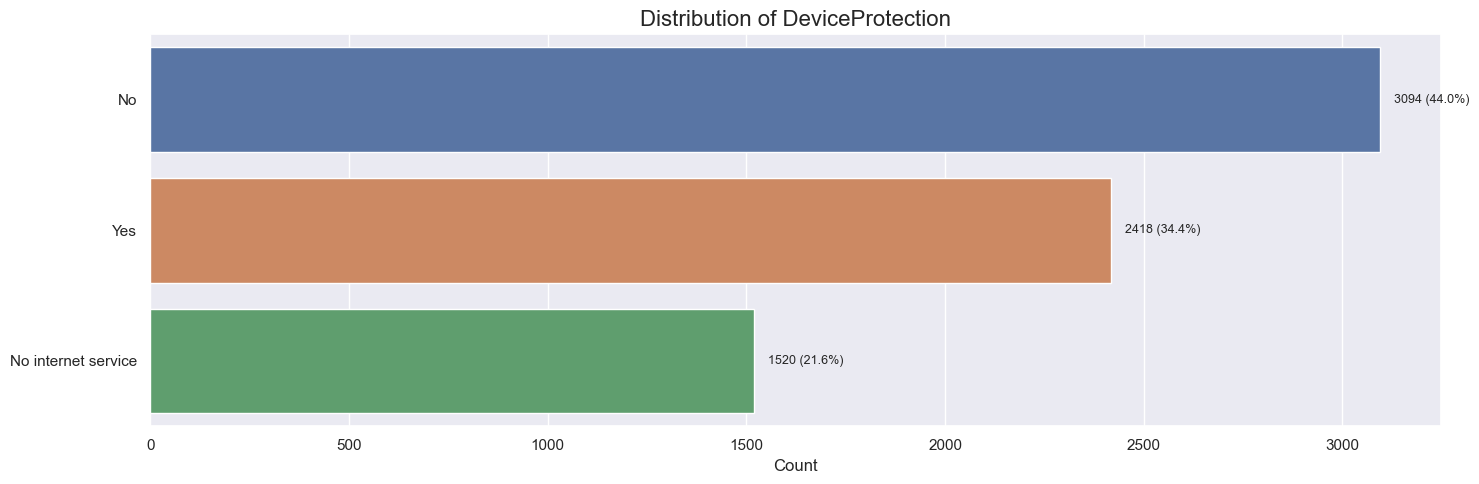

,DeviceProtection,Count,Percentage
0,No,3094,44.0%
1,Yes,2418,34.4%
2,No internet service,1520,21.6%


In [24]:
plot_countplot_with_hue(df, 'DeviceProtection')

##### Business Insights

- Sebanyak 44,0% pelanggan tidak menggunakan layanan Device Protection, sementara 34,4% sudah memanfaatkannya. Sementara itu, 21,6% pelanggan tidak memiliki layanan internet. Ini menunjukkan bahwa perlindungan perangkat belum menjadi layanan yang dominan, meskipun masih memiliki potensi pasar yang cukup besar.

#### 2.5.15 Bagaimana karakteristik distribusi pelanggan berdasarkan dukungan teknis?

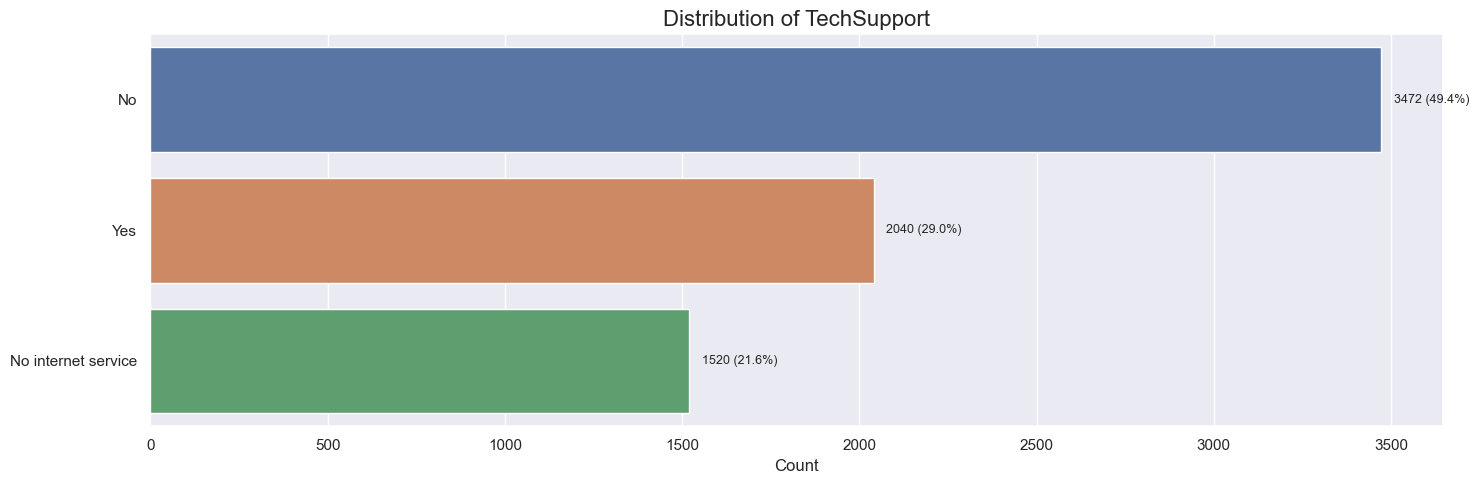

,TechSupport,Count,Percentage
0,No,3472,49.4%
1,Yes,2040,29.0%
2,No internet service,1520,21.6%


In [25]:
plot_countplot_with_hue(df, 'TechSupport')

##### Business Insights

- Sebanyak 49,4% pelanggan tidak menggunakan layanan Tech Support, 29,0% menggunakannya, dan 21,6% tidak memiliki layanan internet. Ini menunjukkan bahwa mayoritas pelanggan internet belum memanfaatkan dukungan teknis sebagai bagian dari layanan mereka.

#### 2.5.16 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming TV?

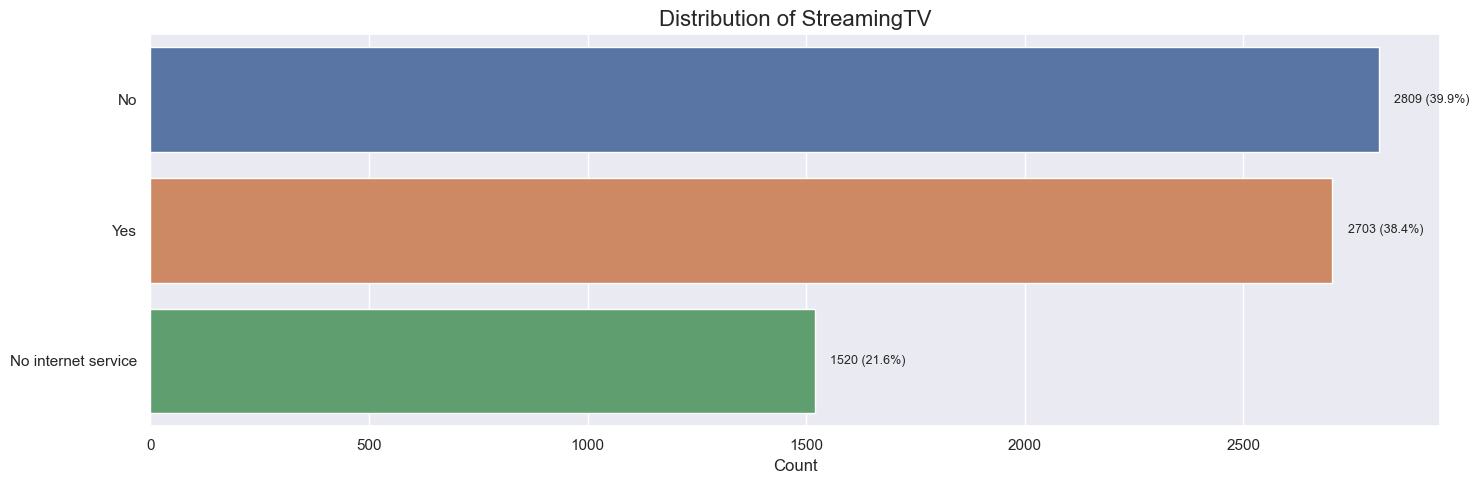

,StreamingTV,Count,Percentage
0,No,2809,39.9%
1,Yes,2703,38.4%
2,No internet service,1520,21.6%


In [26]:
plot_countplot_with_hue(df, 'StreamingTV')

##### Business Insights

- Penggunaan layanan Streaming TV terbagi cukup merata, dengan 39,9% pelanggan tidak menggunakannya dan 38,4% menggunakannya. Sebanyak 21,6% pelanggan tidak memiliki layanan internet. Ini menunjukkan bahwa layanan ini memiliki potensi pertumbuhan lebih lanjut di segmen pengguna internet.

#### 2.5.17 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming film?


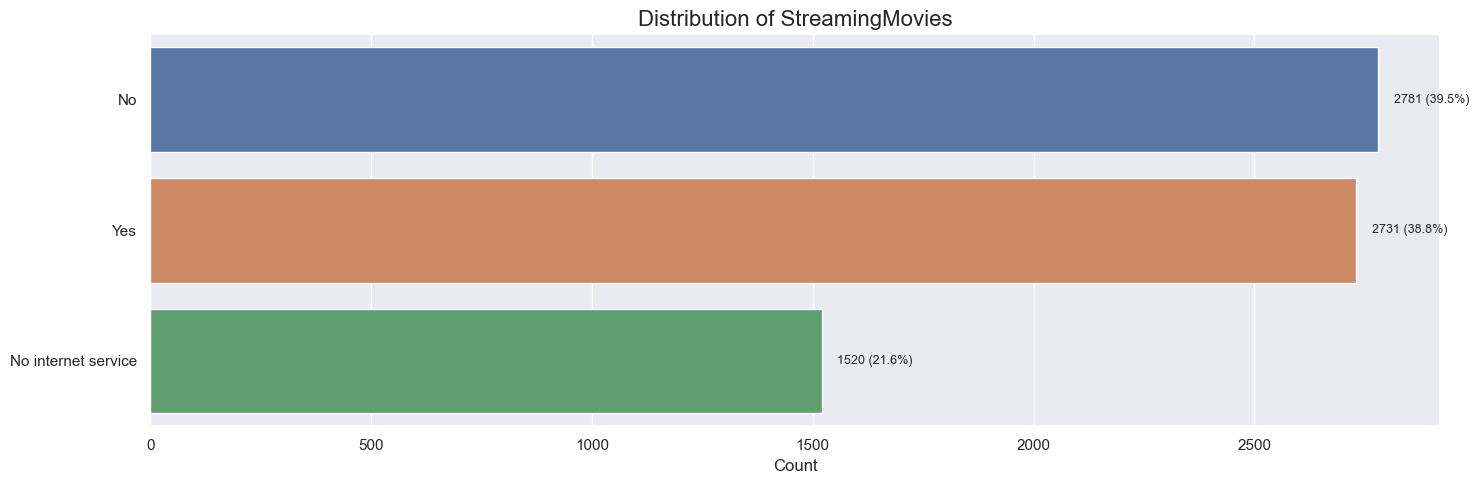

,StreamingMovies,Count,Percentage
0,No,2781,39.5%
1,Yes,2731,38.8%
2,No internet service,1520,21.6%


In [27]:
plot_countplot_with_hue(df, 'StreamingMovies')

##### Business Insights

- Penggunaan layanan Streaming Movies cukup seimbang, dengan 39,5% pelanggan tidak menggunakannya dan 38,8% menggunakannya. Sebanyak 21,6% pelanggan tidak memiliki layanan internet. Hal ini menunjukkan bahwa layanan ini memiliki tingkat adopsi yang hampir setara di kalangan pelanggan internet.

#### 2.5.18 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kontrak langganan?


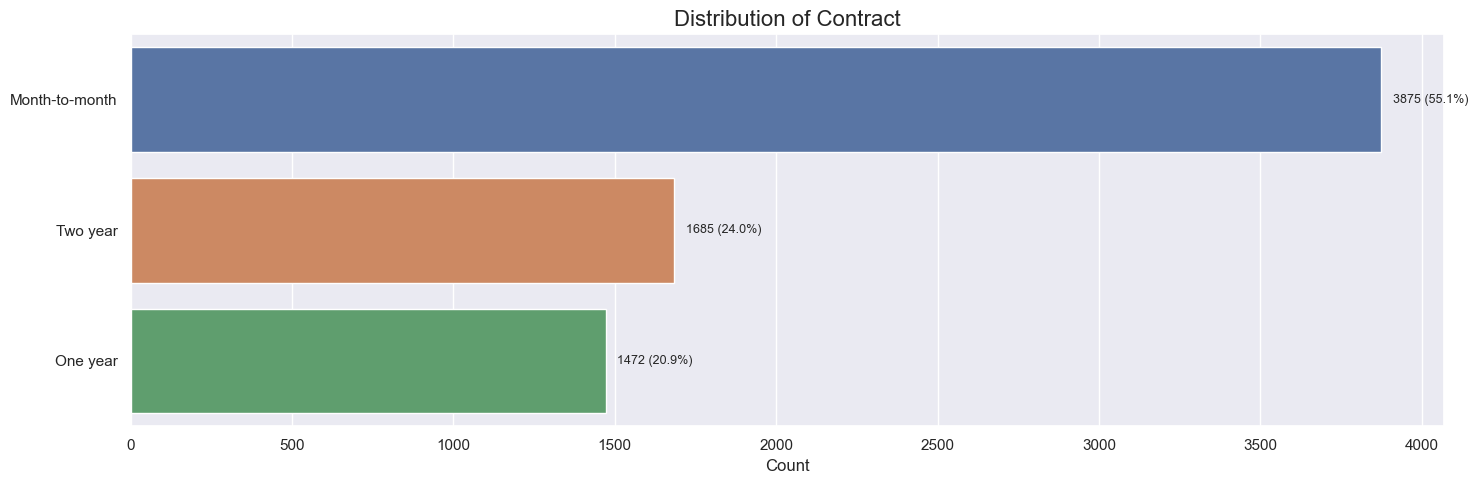

,Contract,Count,Percentage
0,Month-to-month,3875,55.1%
1,Two year,1685,24.0%
2,One year,1472,20.9%


In [28]:
plot_countplot_with_hue(df, 'Contract')

##### Business Insights

- Mayoritas pelanggan (55,1%) menggunakan kontrak bulanan (Month-to-month), sementara hanya 24,0% memilih kontrak dua tahun dan 20,9% kontrak satu tahun. Ini menunjukkan bahwa lebih dari separuh pelanggan memilih fleksibilitas tanpa komitmen jangka panjang.

#### 2.5.19 Bagaimana karakteristik distribusi pelanggan berdasarkan metode paperless?

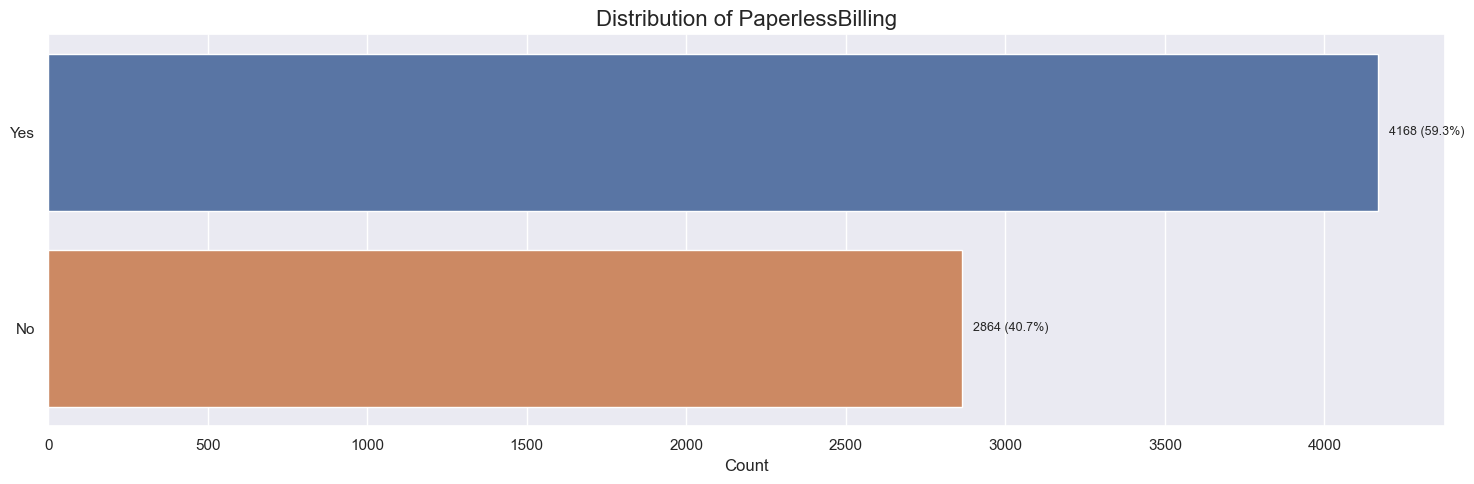

,PaperlessBilling,Count,Percentage
0,Yes,4168,59.3%
1,No,2864,40.7%


In [29]:
plot_countplot_with_hue(df, 'PaperlessBilling')

##### Business Insights

- **Jumlah pelanggan yang menggunakan *Paperless Billing* lebih banyak daripada yang tidak.** Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih untuk menerima tagihan secara digital daripada melalui surat fisik.

#### 2.5.20 Bagaimana karakteristik distribusi pelanggan berdasarkan metode pembayaran?


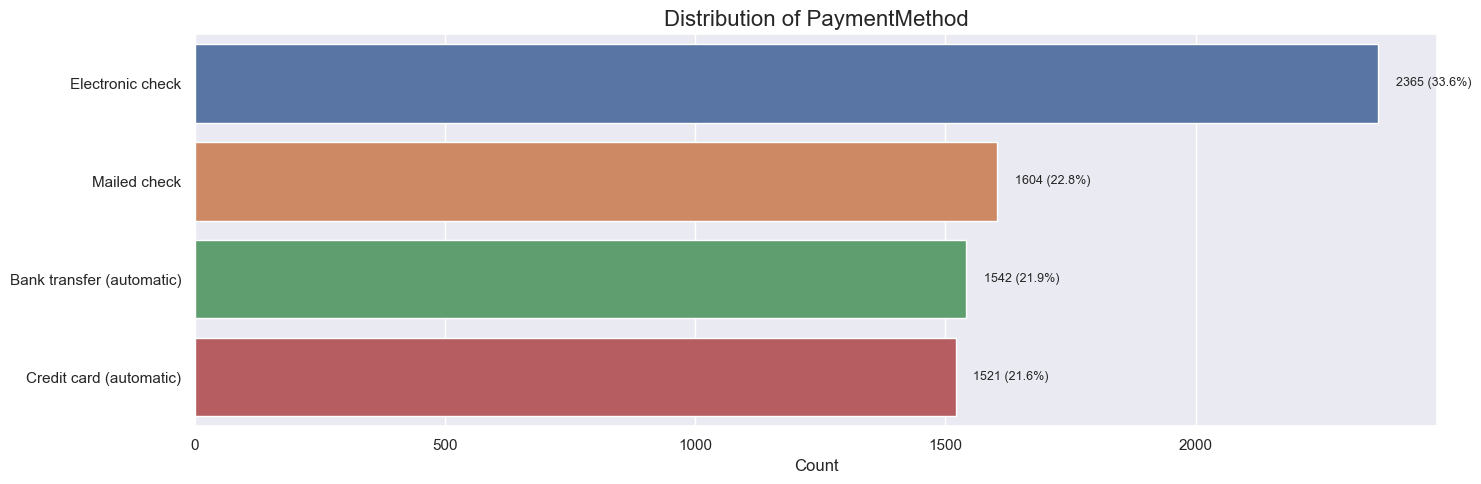

,PaymentMethod,Count,Percentage
0,Electronic check,2365,33.6%
1,Mailed check,1604,22.8%
2,Bank transfer (automatic),1542,21.9%
3,Credit card (automatic),1521,21.6%


In [30]:
plot_countplot_with_hue(df, 'PaymentMethod')

##### Business Insights

- Sebagian besar pelanggan (59,3%) menggunakan metode tagihan tanpa kertas (Paperless Billing), sementara 40,7% masih memilih tagihan fisik. Ini menunjukkan bahwa mayoritas pelanggan sudah terbiasa dengan pendekatan digital, meskipun sebagian masih memilih metode tradisional.

### 2.6 Exploratory Data Analysis (EDA) - Bivariat

In [31]:
CHURN_PALETTE = {'No': 'gray', 'Yes': 'firebrick'}

In [32]:
def plot_box_and_kde_churn(df, col, target='Churn', figsize=(15, 6)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)

    # Boxplot
    sns.boxplot(data=df, x=col, y=target, orient='h',
                ax=axes[0], hue=target, palette=CHURN_PALETTE)
    axes[0].set_title(f'Boxplot of {col}')
    
    # Remove legend from boxplot (safely)
    legend = axes[0].get_legend()
    if legend is not None:
        legend.remove()

    # KDE plot with custom legend labels
    for label in df[target].unique():
        subset = df[df[target] == label]
        label_text = f"{label}" if label == "Yes" else f"{label}"
        sns.kdeplot(
            data=subset, x=col, fill=True, common_norm=False,
            alpha=0.5, ax=axes[1], label=label_text, color=CHURN_PALETTE.get(label, 'gray')
        )

    axes[1].set_title(f'Distribution of {col}')
    axes[1].legend(title=target)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Statistik deskriptif
    stats = df.groupby(target)[col].describe()
    stats['IQR'] = stats['75%'] - stats['25%']
    display(stats)


Fungsi `plot_box_and_kde_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier, serta KDE plot (Kernel Density Estimate) untuk melihat pola distribusi tiap kategori secara halus. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [33]:
def plot_stacked_barh_churn(df, col, target='Churn', figsize=(15, 5)):
    # Hitung count & percentage
    counts = df.groupby([col, target], observed=True).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Pastikan urutan kolom: No, Yes
    desired_order = ['No', 'Yes']
    actual_order = [c for c in desired_order if c in percentages.columns]
    counts = counts[actual_order]
    percentages = percentages[actual_order]

    # Urutkan berdasarkan persentase churn (ascending)
    sort_order = percentages['No'].sort_values(ascending=True).index
    counts = counts.loc[sort_order]
    percentages = percentages.loc[sort_order]

    # Visualisasi stacked bar
    fig, ax = plt.subplots(figsize=figsize)
    left = [0] * len(percentages)

    for status in actual_order:
        values = percentages[status]
        bar = ax.barh(percentages.index, values, left=left,
                      label=status, color=CHURN_PALETTE.get(status, 'gray'))

        for i, (pct, cnt) in enumerate(zip(values, counts[status])):
            if pct > 0:
                ax.text(left[i] + pct / 2, i, f'{pct:.1f}%\n({cnt})',
                        ha='center', va='center',
                        fontsize=10, fontweight='bold',
                        color='white' if pct > 15 else 'black')
        left = [l + v for l, v in zip(left, values)]

    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.legend(title=target, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

    # Tabel gabungan (Count dan Persentase)
    table = counts.copy()
    for status in actual_order:
        table[f'{status} (%)'] = percentages[status].apply(lambda x: f'{x:.1f}%')

    table = table.reset_index()
    display(table)


Fungsi `plot_stacked_barh_churn` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


In [34]:
def mannwhitney_test(df, col, target='Churn'):
    # Pastikan hanya ada dua kategori pada target
    categories = df[target].dropna().unique()
    if len(categories) != 2:
        raise ValueError(f"Kolom target '{target}' harus memiliki tepat 2 kategori (misal: 'Yes' dan 'No').")

    # Ambil data dari masing-masing grup
    group1 = df[df[target] == categories[0]][col].dropna()
    group2 = df[df[target] == categories[1]][col].dropna()

    # Uji Mann-Whitney U dua arah
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    # Tampilkan hasil
    print(f"P-value untuk uji Mann-Whitney U antara '{categories[0]}' dan '{categories[1]}' pada kolom '{col}': {p_value:.4f}")
    if p_value < 0.05:
        print(f"Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")
    else:
        print(f"Gagal tolak Ho. Tidak terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")


Fungsi ini bertujuan untuk menguji Bagaimana perbedaan yang signifikan secara statistik antara dua kelompok pada kolom numerik tertentu berdasarkan kategori target seperti 'Churn'. Ia menggunakan uji non-parametrik Mann-Whitney U, yang cocok digunakan saat data tidak diasumsikan berdistribusi normal. Fungsi ini membandingkan distribusi nilai antara dua grup (misalnya 'Yes' dan 'No'), menghasilkan nilai p-value, dan memberikan interpretasi Bagaimanakah hipotesis nol dapat ditolak atau tidak.
- Ho: Tidak ada perbedaan signifikan antara kedua grup.
- Ha: Terdapat perbedaan signifikan antara kedua grup.


In [35]:
def prepare_churn_summary(df: pd.DataFrame):
    global final_yes_df, final_no_df

    # 1. Ambil kolom kategorikal selain 'Churn'
    cat_cols = df.select_dtypes(include='category').columns.drop('Churn')
    summary_df = pd.DataFrame()

    # 2. Hitung count dan percentage
    for col in cat_cols:
        temp = df.groupby([col, 'Churn']).size().reset_index(name='Count')
        temp['Feature'] = col
        temp['Value'] = temp[col]
        total = temp.groupby(col)['Count'].transform('sum')
        temp['Percentage'] = (temp['Count'] / total * 100).round(2)
        summary_df = pd.concat([summary_df, temp], ignore_index=True)

    # 3. Pisahkan berdasarkan churn
    final_yes_df = (
        summary_df[summary_df['Churn'] == 'Yes']
        .sort_values(by='Percentage', ascending=False)
        [['Churn', 'Feature', 'Value', 'Count', 'Percentage']]
    )

    final_no_df = (
        summary_df[summary_df['Churn'] == 'No']
        .sort_values(by='Percentage', ascending=False)
        [['Churn', 'Feature', 'Value', 'Count', 'Percentage']]
    )

Fungsi `prepare_churn_summary` digunakan untuk menghasilkan ringkasan distribusi churn berdasarkan seluruh variabel kategorikal dalam dataset. Fungsi ini menghitung jumlah dan persentase kombinasi antara setiap kategori fitur dengan nilai target `Churn` ('Yes' atau 'No'), lalu menyimpannya ke dalam dua DataFrame terpisah: `final_yes_df` dan `final_no_df`. Setiap baris mencerminkan satu kombinasi fitur-kategori dengan informasi berupa nama fitur (`Feature`), nilai kategorinya (`Value`), jumlah kemunculan (`Count`), serta persentase relatif terhadap total kategori tersebut (`Percentage`). Fungsi ini sangat berguna untuk mengidentifikasi kelompok pelanggan dengan risiko churn tertinggi maupun retensi tertinggi, serta menjadi dasar untuk visualisasi seperti top-10 kategori churn yang paling dominan.


In [36]:
def plot_churn_top10(dataframe: pd.DataFrame, churn_status='Yes'):
    df = dataframe.copy()
    df['Label'] = df['Feature'] + ' - ' + df['Value'].astype(str)
    df = df.sort_values(by='Percentage', ascending=False).head(10)

    # Warna
    palette = "Reds" if churn_status == 'Yes' else "Greys"
    norm = (df['Percentage'] - df['Percentage'].min()) / (df['Percentage'].max() - df['Percentage'].min())
    colors = sns.color_palette(palette, n_colors=len(df))
    colors = [colors[i] for i in norm.rank(method='first').astype(int) - 1]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Label'], df['Percentage'], color=colors)
    ax.set_title(f"Top 10 Persentase Churn ({churn_status})", fontsize=18)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_xticklabels(df['Label'], rotation=45, ha='right', fontsize=11)

    # Anotasi
    for bar, percent in zip(bars, df['Percentage']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{percent:.2f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

Fungsi `plot_churn_top10` digunakan untuk memvisualisasikan 10 kategori teratas dengan persentase churn tertinggi dari DataFrame hasil ringkasan churn, baik untuk status 'Yes' maupun 'No'. Fungsi ini membuat label gabungan dari nama fitur dan nilai kategorinya, kemudian mengurutkan data berdasarkan persentase secara menurun dan memilih 10 teratas. Setiap batang divisualisasikan dalam bentuk bar chart vertikal dengan gradasi warna: merah untuk churn 'Yes' dan abu-abu untuk churn 'No', disesuaikan berdasarkan intensitas persentase. Visualisasi ini dilengkapi anotasi yang menampilkan persentase masing-masing kategori, serta rotasi label sumbu-x untuk meningkatkan keterbacaan. Fungsi ini berguna untuk menyoroti kelompok pelanggan paling rentan terhadap churn atau paling loyal berdasarkan kategori tertentu.

#### 2.6.1 Apakah terdapat perbedaan lama pelanggan berlangganan antara yang churn dan tidak churn?

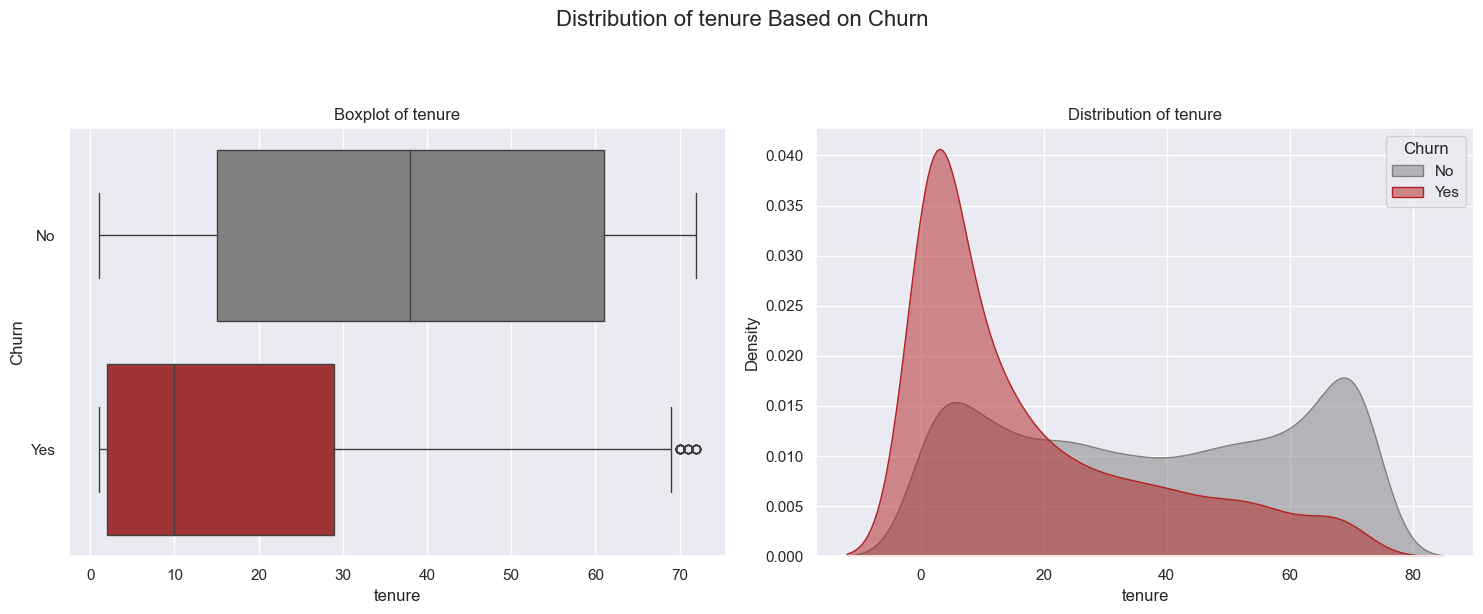

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0,46.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0,27.0


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'tenure': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'tenure'.


In [37]:
plot_box_and_kde_churn(df, 'tenure')
mannwhitney_test(df, 'tenure')

In [38]:
# plt.figure(figsize=(15, 5))

# sns.boxplot(
#     data=df,
#     x='tenure',
#     y='Churn',
#     hue='Churn',
#     orient='h',
#     palette=CHURN_PALETTE
# )

# # Judul besar + beri padding bawah (tidak diabaikan oleh tight_layout)
# plt.title('Boxplot of Tenure by Churn Status', fontsize=20, pad=20)

# plt.xlabel('Tenure (Months)', fontsize=14)
# plt.ylabel('', fontsize=14)

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.legend().remove()

# # Ganti tight_layout dengan manual adjust agar pad pada title terlihat
# plt.subplots_adjust(top=0.85)
# plt.show()


##### Business Insights

- Pelanggan yang tidak churn biasanya sudah lama berlangganan (median 38 bulan), sedangkan yang churn cenderung berhenti dalam waktu singkat (median 10 bulan). Artinya, risiko churn paling besar terjadi di awal masa langganan, terutama dalam 1 tahun pertama. Menjaga pelanggan di fase awal sangat penting untuk mengurangi churn.

#### 2.6.2 Apakah terdapat perbedaan total pengeluaran pelanggan antara yang churn dan tidak churn?


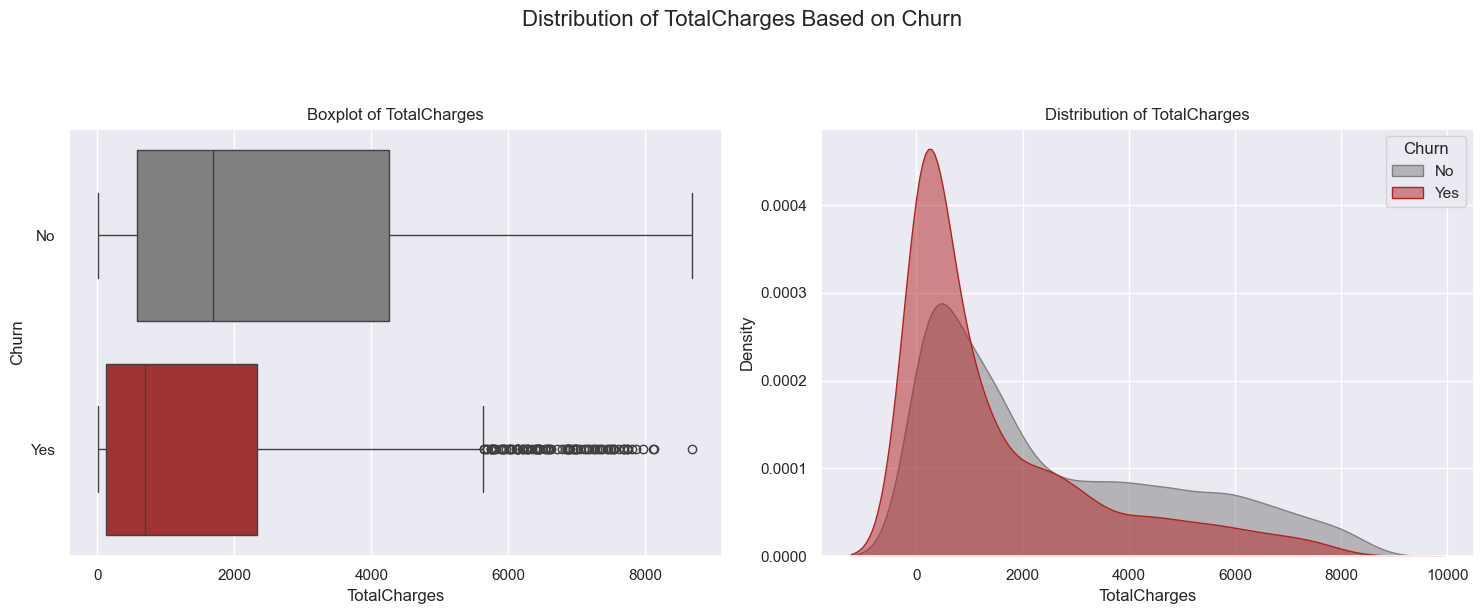

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45,3686.3
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80,2196.8


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'TotalCharges': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'TotalCharges'.


In [39]:
plot_box_and_kde_churn(df, 'TotalCharges')
mannwhitney_test(df, 'TotalCharges')

##### Business Insights

- Pelanggan yang tidak churn memiliki total pengeluaran jauh lebih tinggi (median $1.683) dibanding pelanggan yang churn (median $704). Ini menunjukkan bahwa pelanggan churn sering kali berhenti sebelum memberikan nilai ekonomi maksimal. Banyak churn terjadi saat nilai pelanggan masih rendah.

In [40]:
# plt.figure(figsize=(15, 5))

# sns.boxplot(
#     data=df,
#     x='TotalCharges',
#     y='Churn',
#     hue='Churn',
#     orient='h',
#     palette=CHURN_PALETTE
# )

# # Judul besar + beri padding bawah (tidak diabaikan oleh tight_layout)
# plt.title('Boxplot of Total Charges by Churn Status', fontsize=20, pad=20)

# plt.xlabel('Total Charges', fontsize=14)
# plt.ylabel('', fontsize=14)

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.legend().remove()

# # Ganti tight_layout dengan manual adjust agar pad pada title terlihat
# plt.subplots_adjust(top=0.85)
# plt.show()


#### 2.6.3 Bagaimana perbedaan biaya bulanan pelanggan antara yang churn dan tidak churn?


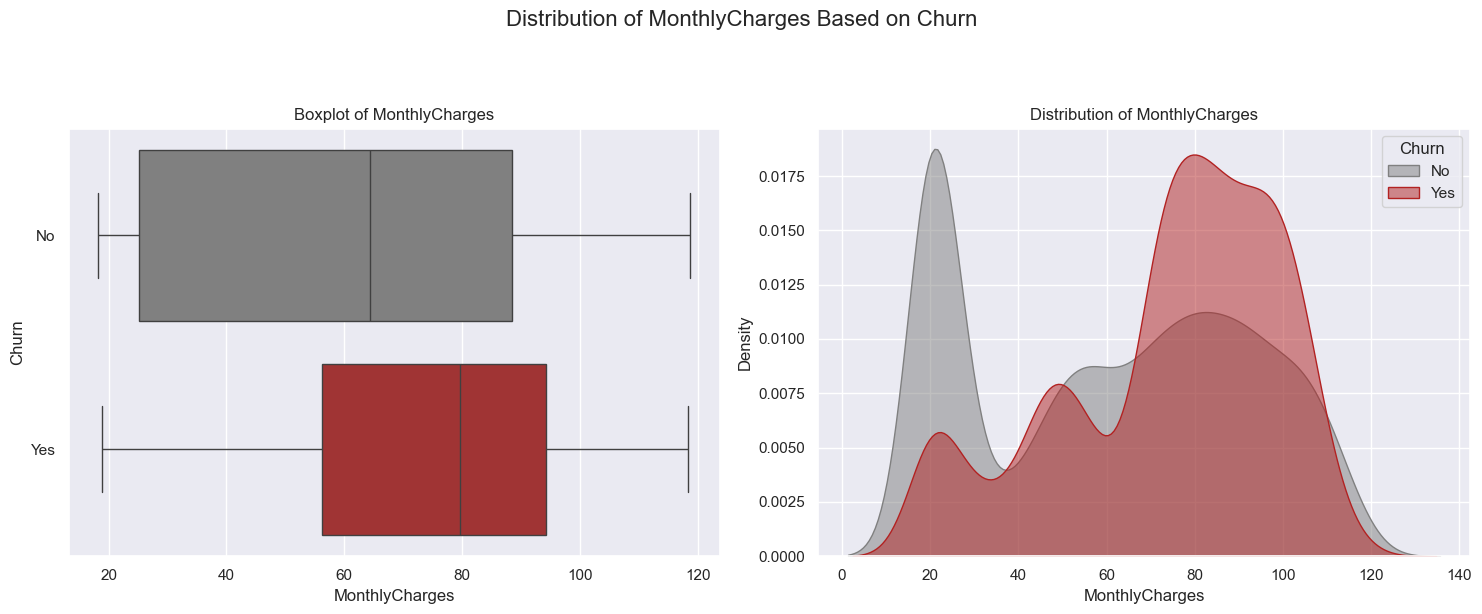

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75,63.375
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35,38.050


P-value untuk uji Mann-Whitney U antara 'No' dan 'Yes' pada kolom 'MonthlyCharges': 0.0000
Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup 'No' dan 'Yes' untuk 'MonthlyCharges'.


In [41]:
plot_box_and_kde_churn(df, 'MonthlyCharges')
mannwhitney_test(df, 'MonthlyCharges')

In [42]:
# plt.figure(figsize=(15, 5))

# sns.boxplot(
#     data=df,
#     x='MonthlyCharges',
#     y='Churn',
#     hue='Churn',
#     orient='h',
#     palette=CHURN_PALETTE
# )

# # Judul besar + beri padding bawah (tidak diabaikan oleh tight_layout)
# plt.title('Boxplot of Monthly Charges by Churn Status', fontsize=20, pad=20)

# plt.xlabel('Monthly Charges', fontsize=14)
# plt.ylabel('', fontsize=14)

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.legend().remove()

# # Ganti tight_layout dengan manual adjust agar pad pada title terlihat
# plt.subplots_adjust(top=0.85)
# plt.show()


##### Business Insights

- Pelanggan yang churn cenderung memiliki tagihan bulanan lebih tinggi (median $79.65) dibanding yang tidak churn (median $64.45). Artinya, semakin mahal biaya bulanan, semakin besar kemungkinan pelanggan untuk berhenti.

#### 2.6.4 Bagaimana perbedaan tingkat churn antara pelanggan laki-laki dan perempuan?

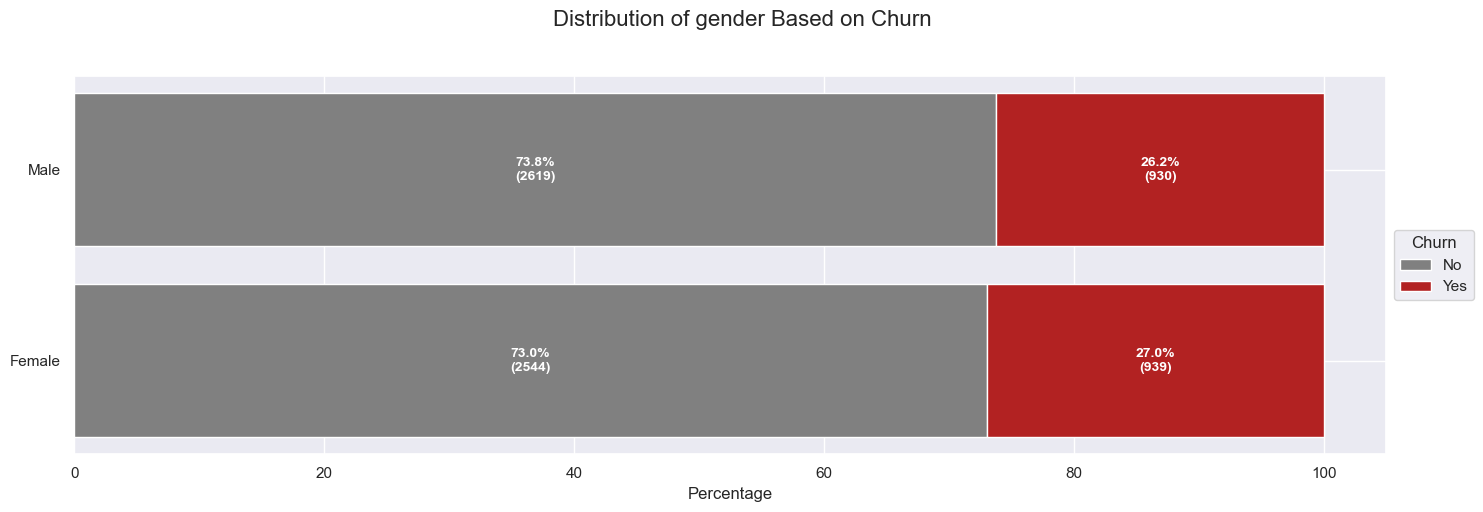

Churn,gender,No,Yes,No (%),Yes (%)
0,Female,2544,939,73.0%,27.0%
1,Male,2619,930,73.8%,26.2%


In [43]:
plot_stacked_barh_churn(df, 'gender')

##### Business Insights

- Tingkat churn antara pelanggan laki-laki (26.2%) dan perempuan (27.0%) hampir sama. Artinya, gender bukan faktor penentu utama dalam keputusan pelanggan untuk berhenti berlangganan.

#### 2.6.5 Bagaimana perbedaan tingkat churn antara pelanggan lansia dan non-lansia?


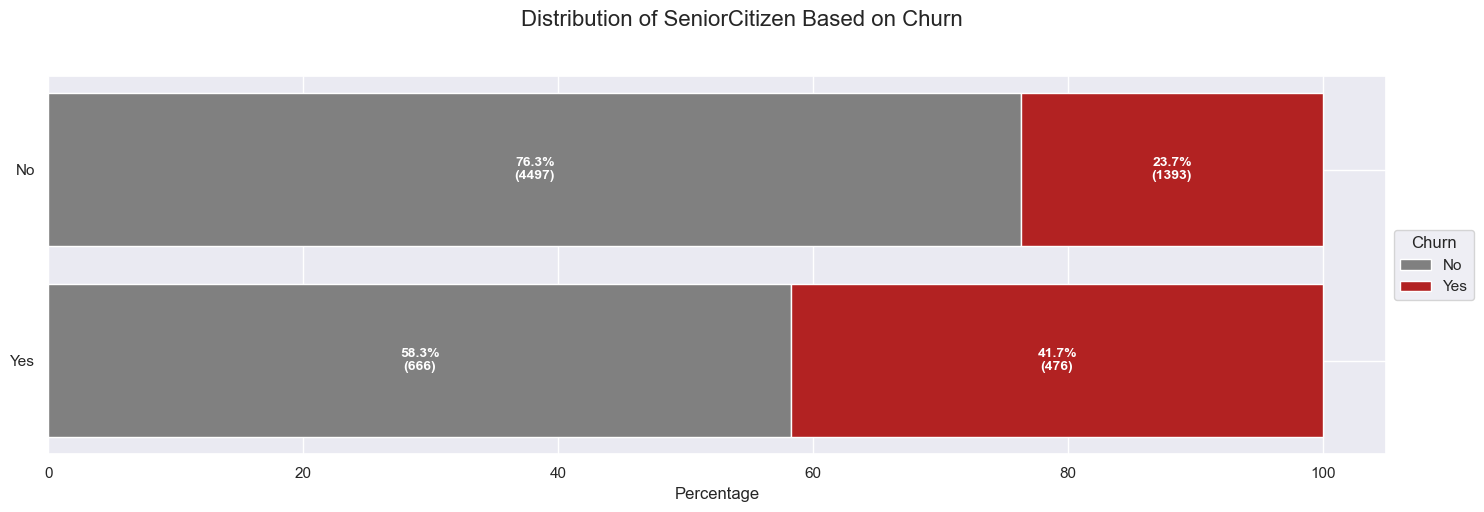

Churn,SeniorCitizen,No,Yes,No (%),Yes (%)
0,Yes,666,476,58.3%,41.7%
1,No,4497,1393,76.3%,23.7%


In [44]:
plot_stacked_barh_churn(df, 'SeniorCitizen')

##### Business Insights

- Pelanggan lansia (SeniorCitizen = Yes) memiliki tingkat churn yang jauh lebih tinggi (41.7%) dibandingkan pelanggan non-lansia (23.7%). Ini menunjukkan bahwa pelanggan lansia cenderung lebih rentan untuk berhenti berlangganan.

#### 2.6.6 Bagaimana perbedaan tingkat churn antara pelanggan yang memiliki pasangan dan yang tidak?


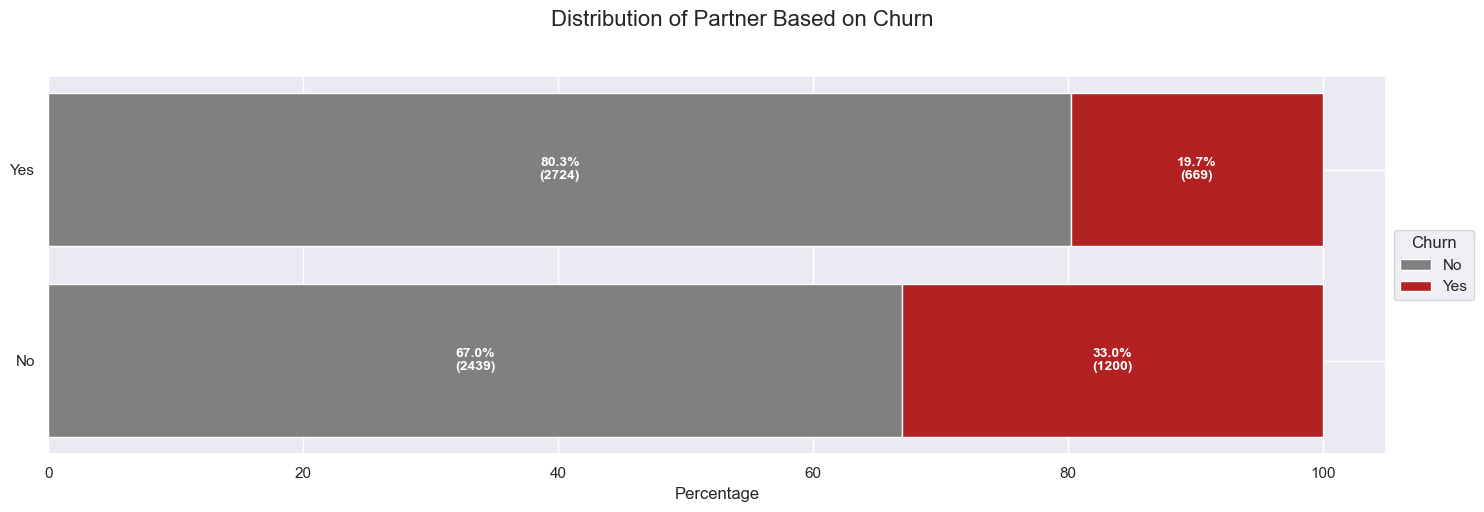

Churn,Partner,No,Yes,No (%),Yes (%)
0,No,2439,1200,67.0%,33.0%
1,Yes,2724,669,80.3%,19.7%


In [45]:
plot_stacked_barh_churn(df, 'Partner')

##### Business Insights

- Pelanggan tanpa pasangan (Partner = No) memiliki tingkat churn yang jauh lebih tinggi (33.0%) dibandingkan pelanggan yang memiliki pasangan (19.7%). Ini menunjukkan bahwa pelanggan yang hidup sendiri cenderung lebih mudah meninggalkan layanan.

#### 2.6.7 Bagaimana perbedaan tingkat churn antara pelanggan yang memiliki tanggungan dan yang tidak?


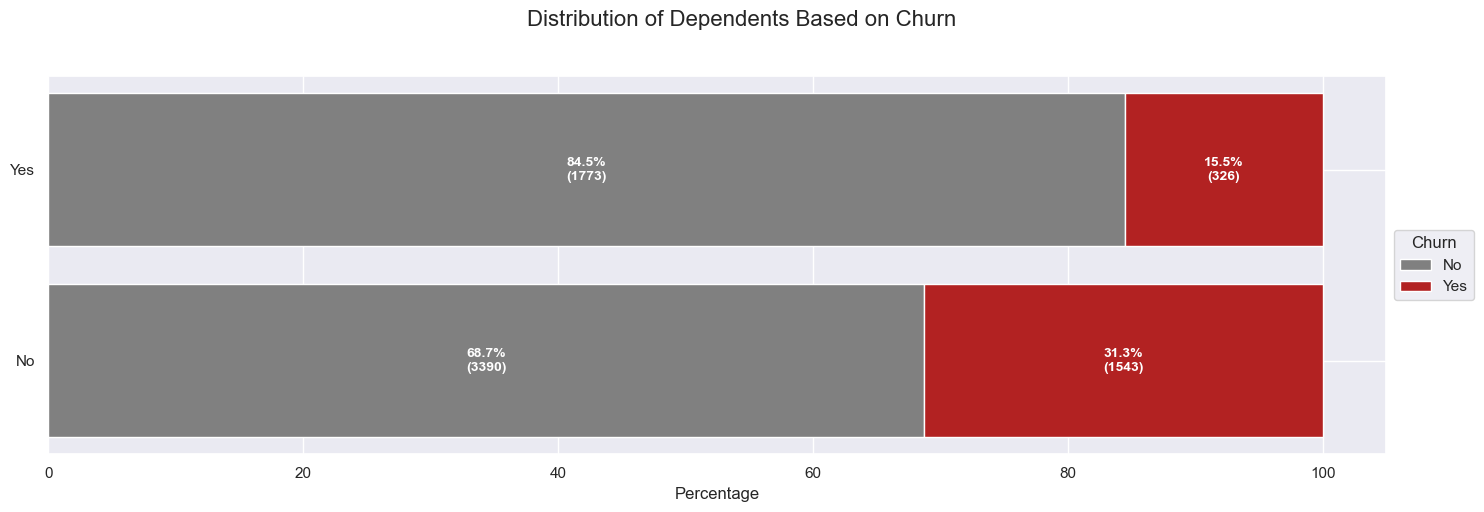

Churn,Dependents,No,Yes,No (%),Yes (%)
0,No,3390,1543,68.7%,31.3%
1,Yes,1773,326,84.5%,15.5%


In [46]:
plot_stacked_barh_churn(df, 'Dependents')

##### Business Insights

- Pelanggan tanpa tanggungan (Dependents = No) memiliki tingkat churn yang jauh lebih tinggi (31.3%) dibandingkan pelanggan dengan tanggungan (15.5%). Ini menunjukkan bahwa pelanggan dengan tanggungan cenderung lebih stabil dan loyal terhadap layanan.

#### 2.6.8 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan telepon dan yang tidak?


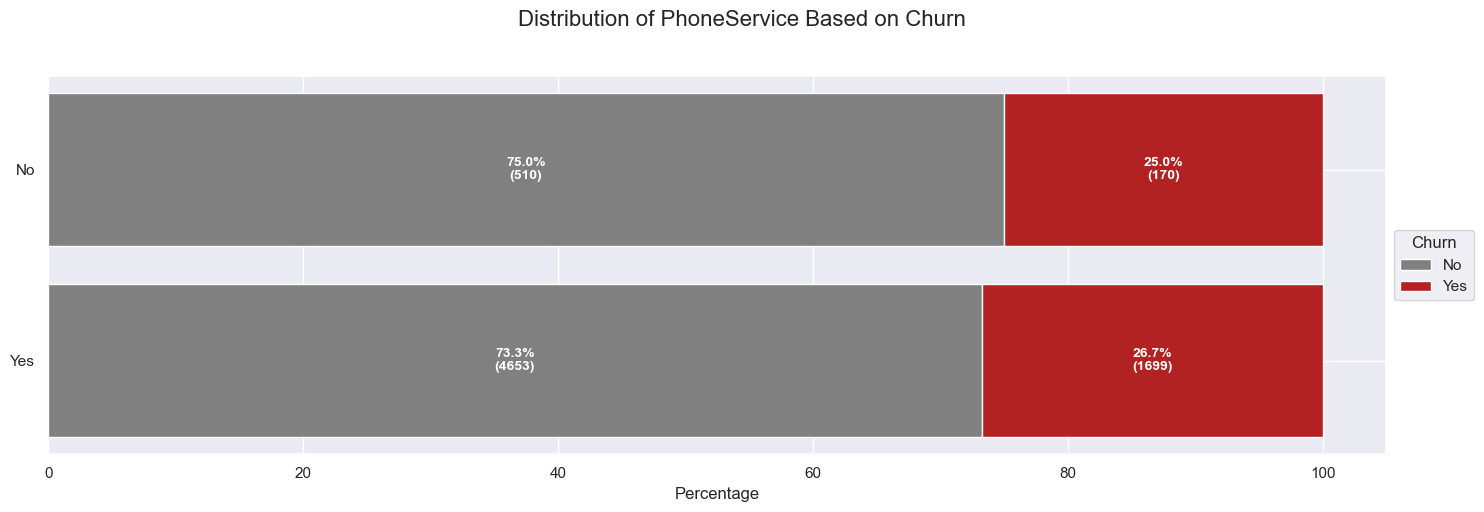

Churn,PhoneService,No,Yes,No (%),Yes (%)
0,Yes,4653,1699,73.3%,26.7%
1,No,510,170,75.0%,25.0%


In [47]:
plot_stacked_barh_churn(df, 'PhoneService')

##### Business Insights

- Tingkat churn antara pelanggan yang memiliki layanan telepon (26.7%) dan yang tidak memiliki (25.0%) relatif serupa. Ini menunjukkan bahwa keberadaan layanan telepon tidak memiliki pengaruh signifikan terhadap churn.

#### 2.6.9 Bagaimanakah tingkat churn berbeda antara pelanggan yang memiliki beberapa saluran telepon, satu saluran, atau tidak menggunakan layanan telepon?


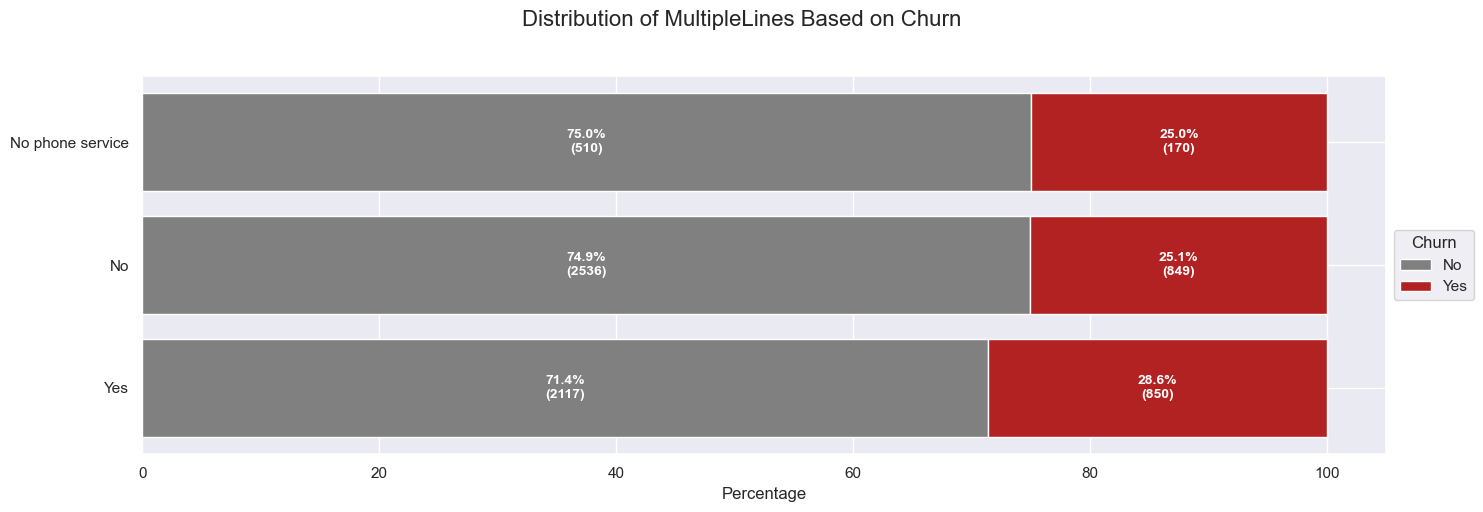

Churn,MultipleLines,No,Yes,No (%),Yes (%)
0,Yes,2117,850,71.4%,28.6%
1,No,2536,849,74.9%,25.1%
2,No phone service,510,170,75.0%,25.0%


In [48]:
plot_stacked_barh_churn(df, 'MultipleLines')

##### Business Insights

- **Pelanggan dengan layanan *Multiple Lines* memiliki tingkat *churn* yang sedikit lebih tinggi (sekitar 29%) dibandingkan pelanggan dengan satu jalur telepon (sekitar 25%).** Hal ini menunjukkan bahwa layanan tambahan ini, meskipun meningkatkan pendapatan, juga berkorelasi dengan risiko *churn* yang sedikit lebih besar.

#### 2.6.10 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan DSL, fiber optic, atau tidak menggunakan layanan internet?


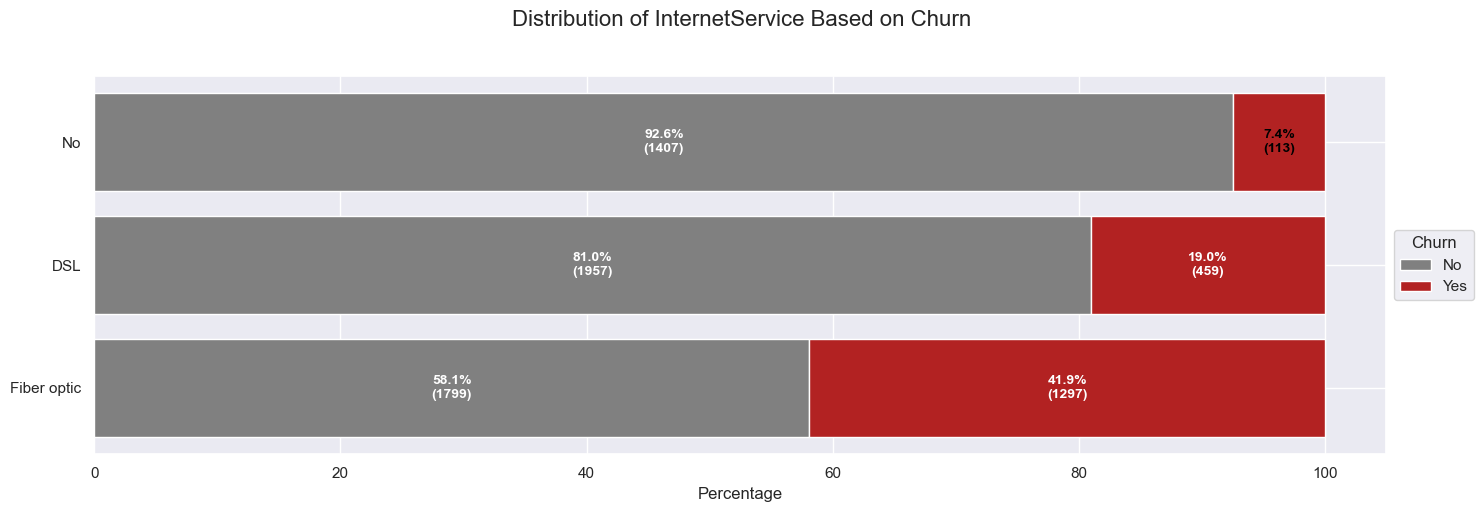

Churn,InternetService,No,Yes,No (%),Yes (%)
0,Fiber optic,1799,1297,58.1%,41.9%
1,DSL,1957,459,81.0%,19.0%
2,No,1407,113,92.6%,7.4%


In [49]:
plot_stacked_barh_churn(df, 'InternetService')

##### Business Insights

- Pelanggan dengan lebih dari satu saluran telepon (`MultipleLines = Yes`) memiliki tingkat churn sedikit lebih tinggi (28.6%) dibanding yang hanya punya satu saluran (25.1%). Meskipun selisihnya tidak besar, hal ini bisa mencerminkan bahwa pelanggan dengan banyak saluran mungkin lebih demanding dan sensitif terhadap layanan.

#### 2.6.11 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan keamanan online, tidak menggunakan, atau tidak memiliki layanan internet?


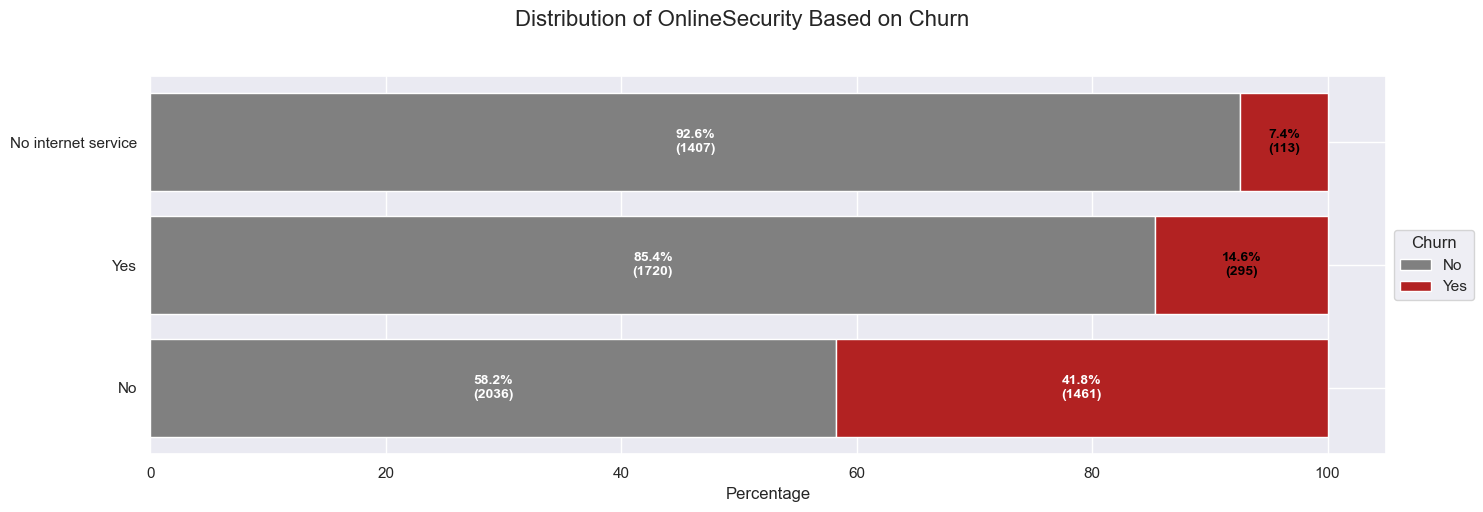

Churn,OnlineSecurity,No,Yes,No (%),Yes (%)
0,No,2036,1461,58.2%,41.8%
1,Yes,1720,295,85.4%,14.6%
2,No internet service,1407,113,92.6%,7.4%


In [50]:
plot_stacked_barh_churn(df, 'OnlineSecurity')

##### Business Insights

- Tingkat churn jauh lebih rendah pada pelanggan yang menggunakan layanan `OnlineSecurity` (14.6%) dibanding yang tidak menggunakannya (41.8%). Bahkan, pelanggan tanpa internet pun menunjukkan churn sangat rendah (7.4%), yang menegaskan pentingnya layanan keamanan digital sebagai faktor retensi utama.

#### 2.6.12 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan cadangan data online, tidak menggunakan, atau tidak memiliki layanan internet?


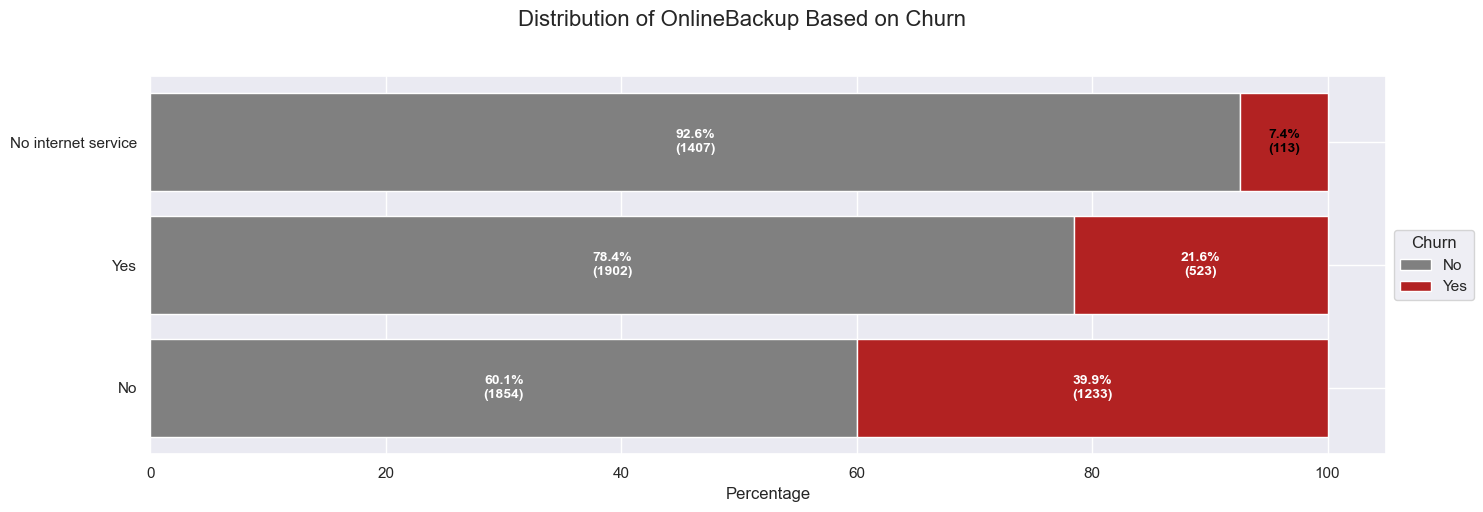

Churn,OnlineBackup,No,Yes,No (%),Yes (%)
0,No,1854,1233,60.1%,39.9%
1,Yes,1902,523,78.4%,21.6%
2,No internet service,1407,113,92.6%,7.4%


In [51]:
plot_stacked_barh_churn(df, 'OnlineBackup')

##### Business Insights

- Pelanggan yang menggunakan layanan `OnlineBackup` memiliki tingkat churn lebih rendah (21.6%) dibanding yang tidak menggunakannya (39.9%). Ini menunjukkan bahwa layanan pendukung seperti backup data dapat meningkatkan loyalitas. Bahkan pelanggan tanpa layanan internet menunjukkan churn sangat rendah (7.4%).

#### 2.6.13 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan perangkat, tidak menggunakan, atau tidak memiliki layanan internet?


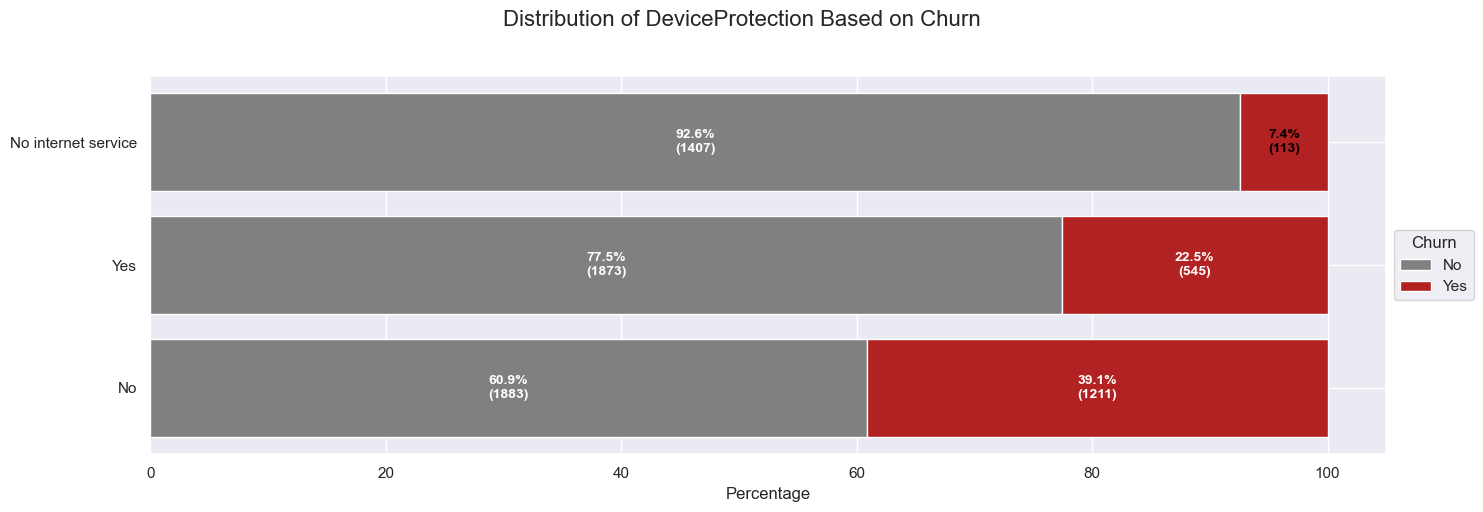

Churn,DeviceProtection,No,Yes,No (%),Yes (%)
0,No,1883,1211,60.9%,39.1%
1,Yes,1873,545,77.5%,22.5%
2,No internet service,1407,113,92.6%,7.4%


In [52]:
plot_stacked_barh_churn(df, 'DeviceProtection')

##### Business Insights

- Pelanggan yang menggunakan layanan `DeviceProtection` memiliki tingkat churn lebih rendah (22.5%) dibanding yang tidak menggunakannya (39.1%). Hal ini mengindikasikan bahwa layanan tambahan yang memberikan rasa aman terhadap perangkat berkontribusi pada retensi pelanggan. Pelanggan tanpa internet menunjukkan churn sangat rendah (7.4%), menandakan keterkaitan kuat antara layanan internet dan kebutuhan akan proteksi perangkat.

#### 2.6.14 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan dukungan teknis, tidak menggunakan, atau tidak memiliki layanan internet?


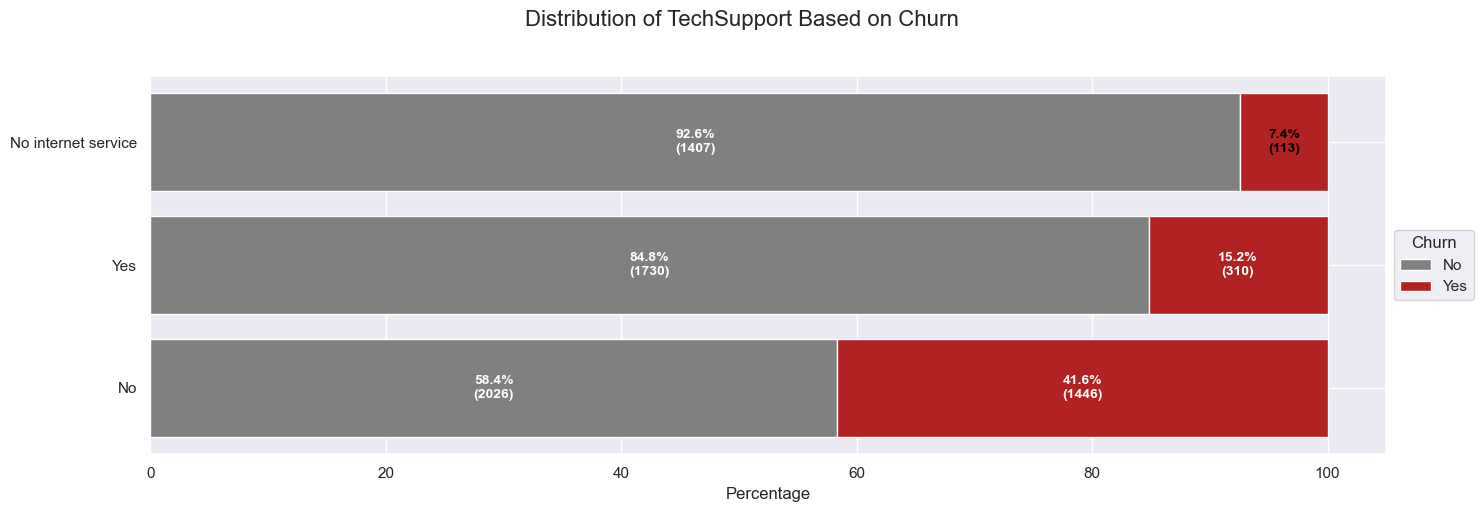

Churn,TechSupport,No,Yes,No (%),Yes (%)
0,No,2026,1446,58.4%,41.6%
1,Yes,1730,310,84.8%,15.2%
2,No internet service,1407,113,92.6%,7.4%


In [53]:
plot_stacked_barh_churn(df, 'TechSupport')

##### Business Insights

- **Pelanggan internet yang tidak memiliki *Tech Support* memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 42%.** Ini menjadikan mereka sebagai salah satu segmen pelanggan dengan risiko tertinggi untuk berhenti berlangganan.

- **Sebaliknya, pelanggan yang memiliki *Tech Support* tingkat *churn*-nya sangat rendah, yaitu sekitar 15%.** Hal ini membuktikan bahwa layanan *Tech Support* adalah fitur yang sangat vital untuk mempertahankan pelanggan.

- **Secara keseluruhan, ketiadaan layanan *Tech Support* adalah salah satu prediktor *churn* terkuat.** Pelanggan internet tanpa dukungan teknis ini hampir tiga kali lebih mungkin untuk berhenti berlangganan.

#### 2.6.15 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming TV, tidak menggunakan, atau tidak memiliki layanan internet?


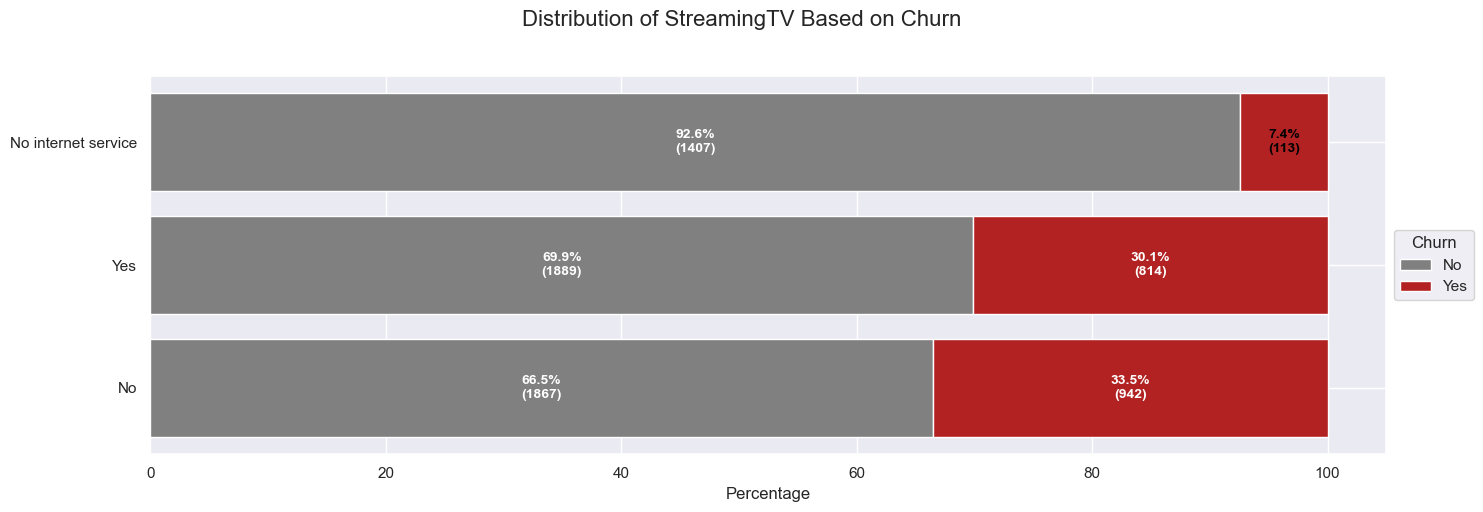

Churn,StreamingTV,No,Yes,No (%),Yes (%)
0,No,1867,942,66.5%,33.5%
1,Yes,1889,814,69.9%,30.1%
2,No internet service,1407,113,92.6%,7.4%


In [54]:
plot_stacked_barh_churn(df, 'StreamingTV')

##### Business Insights

- Pelanggan yang tidak memiliki layanan internet memiliki tingkat churn sangat rendah (7.4%), kemungkinan karena mereka hanya menggunakan layanan dasar (basic service).

- Pelanggan yang tidak menggunakan layanan StreamingTV memiliki churn sedikit lebih tinggi (33.5%) dibanding pengguna StreamingTV (30.1%). Ini menunjukkan bahwa penggunaan layanan hiburan seperti StreamingTV mungkin berkorelasi dengan loyalitas yang sedikit lebih tinggi.

- Namun, perbedaannya relatif kecil, sehingga StreamingTV bukan faktor utama penentu churn, melainkan bisa jadi bagian dari preferensi layanan pelanggan yang sudah puas.

#### 2.6.16 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming film, tidak menggunakan, atau tidak memiliki layanan internet?


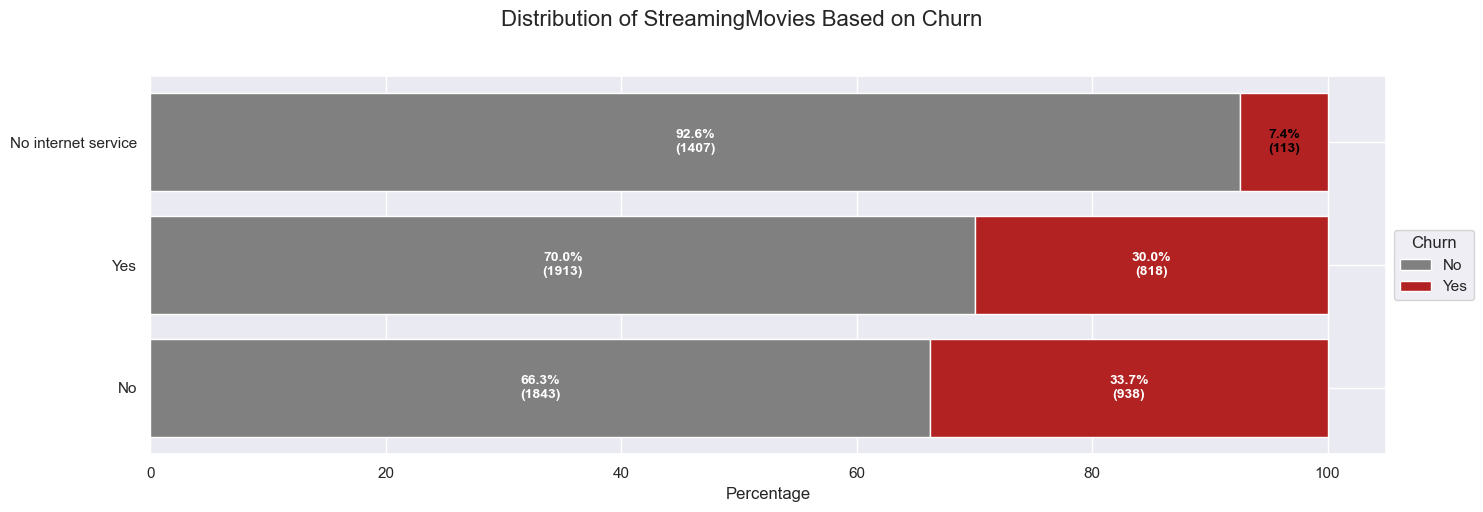

Churn,StreamingMovies,No,Yes,No (%),Yes (%)
0,No,1843,938,66.3%,33.7%
1,Yes,1913,818,70.0%,30.0%
2,No internet service,1407,113,92.6%,7.4%


In [55]:
plot_stacked_barh_churn(df, 'StreamingMovies')

##### Business Insights

- Tingkat churn pelanggan yang menonton film (`Yes`) dan yang tidak (`No`) cukup mirip (30.0% vs 33.7%). Artinya, layanan `StreamingMovies` tidak terlalu berpengaruh dalam menekan churn. Sementara itu, pelanggan tanpa layanan internet kembali menunjukkan churn yang sangat rendah (7.4%).

#### 2.6.17 Bagaimanakah tingkat churn berbeda berdasarkan jenis kontrak langganan yang dipilih pelanggan?


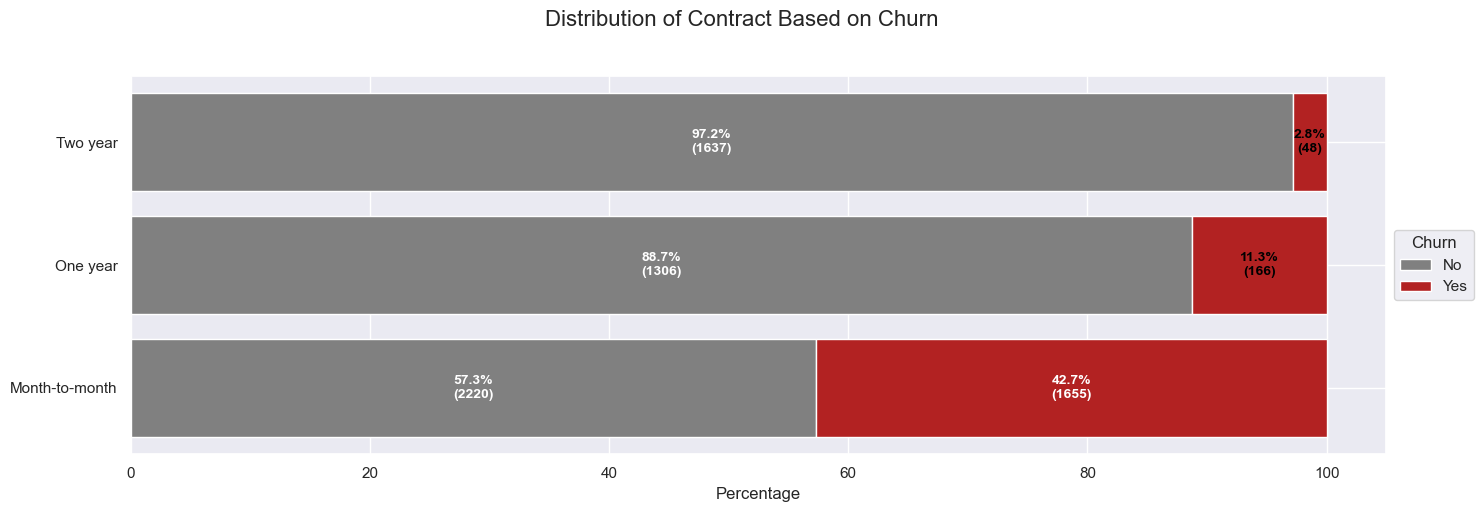

Churn,Contract,No,Yes,No (%),Yes (%)
0,Month-to-month,2220,1655,57.3%,42.7%
1,One year,1306,166,88.7%,11.3%
2,Two year,1637,48,97.2%,2.8%


In [56]:
plot_stacked_barh_churn(df, 'Contract')

##### Business Insights

- Pelanggan dengan kontrak **month-to-month** memiliki tingkat churn tertinggi (42.7%), jauh lebih tinggi dibandingkan dengan kontrak **one year** (11.3%) dan **two year** (2.8%). Artinya, semakin lama durasi kontrak, semakin kecil kemungkinan pelanggan untuk churn.

#### 2.6.18 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan tagihan tanpa kertas dan yang tidak?


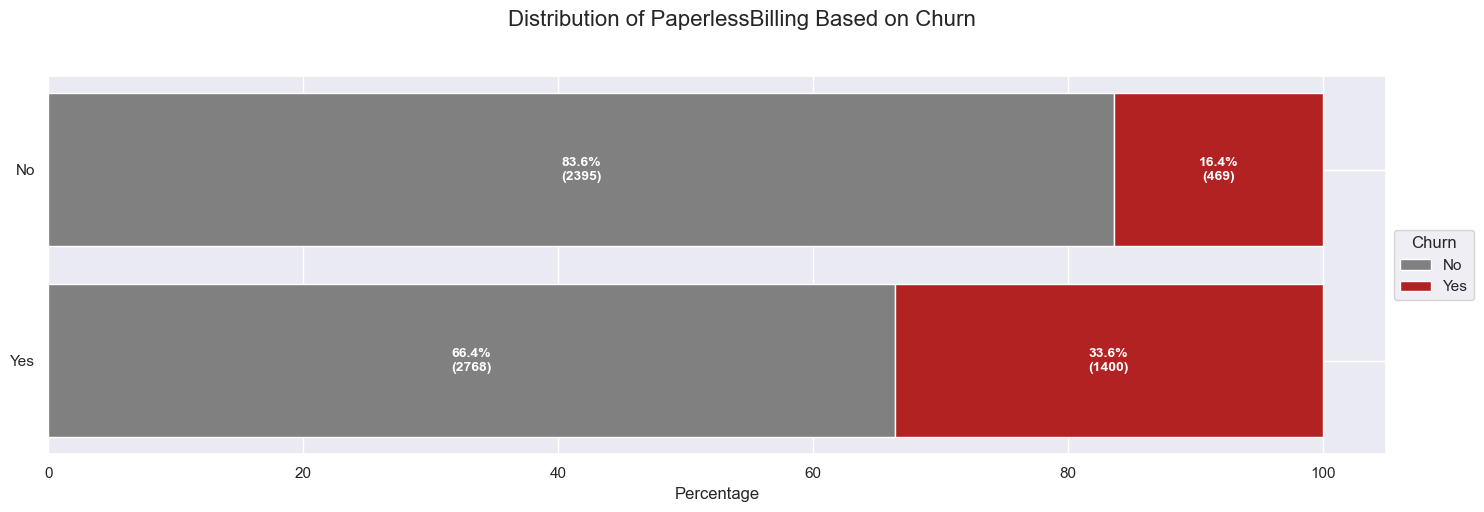

Churn,PaperlessBilling,No,Yes,No (%),Yes (%)
0,Yes,2768,1400,66.4%,33.6%
1,No,2395,469,83.6%,16.4%


In [57]:
plot_stacked_barh_churn(df, 'PaperlessBilling')

##### Business Insights

- Pelanggan yang menggunakan **paperless billing** memiliki tingkat churn lebih tinggi (33.6%) dibandingkan dengan yang tidak menggunakan (16.4%). Ini menunjukkan bahwa pelanggan digital cenderung lebih mudah berhenti berlangganan.

#### 2.6.19 Bagaimanakah tingkat churn berbeda berdasarkan metode pembayaran yang digunakan pelanggan?


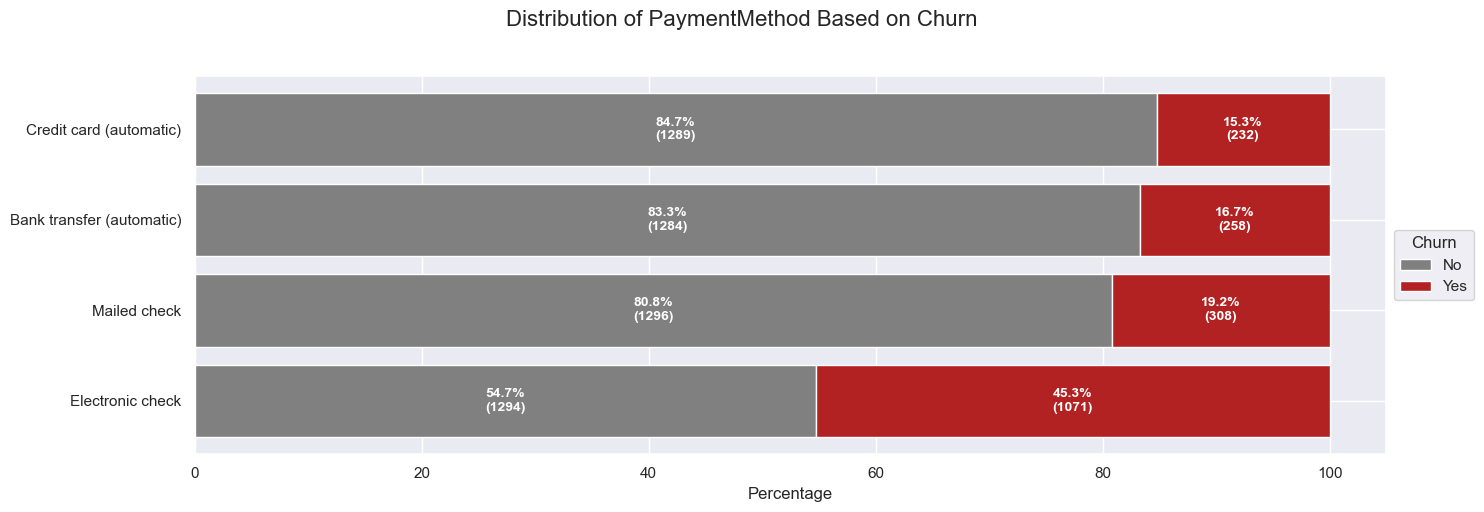

Churn,PaymentMethod,No,Yes,No (%),Yes (%)
0,Electronic check,1294,1071,54.7%,45.3%
1,Mailed check,1296,308,80.8%,19.2%
2,Bank transfer (automatic),1284,258,83.3%,16.7%
3,Credit card (automatic),1289,232,84.7%,15.3%


In [58]:
plot_stacked_barh_churn(df, 'PaymentMethod')

##### Business Insights

- Pelanggan yang menggunakan **Electronic check** memiliki tingkat churn paling tinggi (45.3%), jauh di atas metode pembayaran otomatis seperti **Credit card (15.3%)** atau **Bank transfer (16.7%)**.
- Metode manual seperti *mailed check* juga menunjukkan churn yang relatif rendah (19.2%).

### 2.7 Business Conclusions

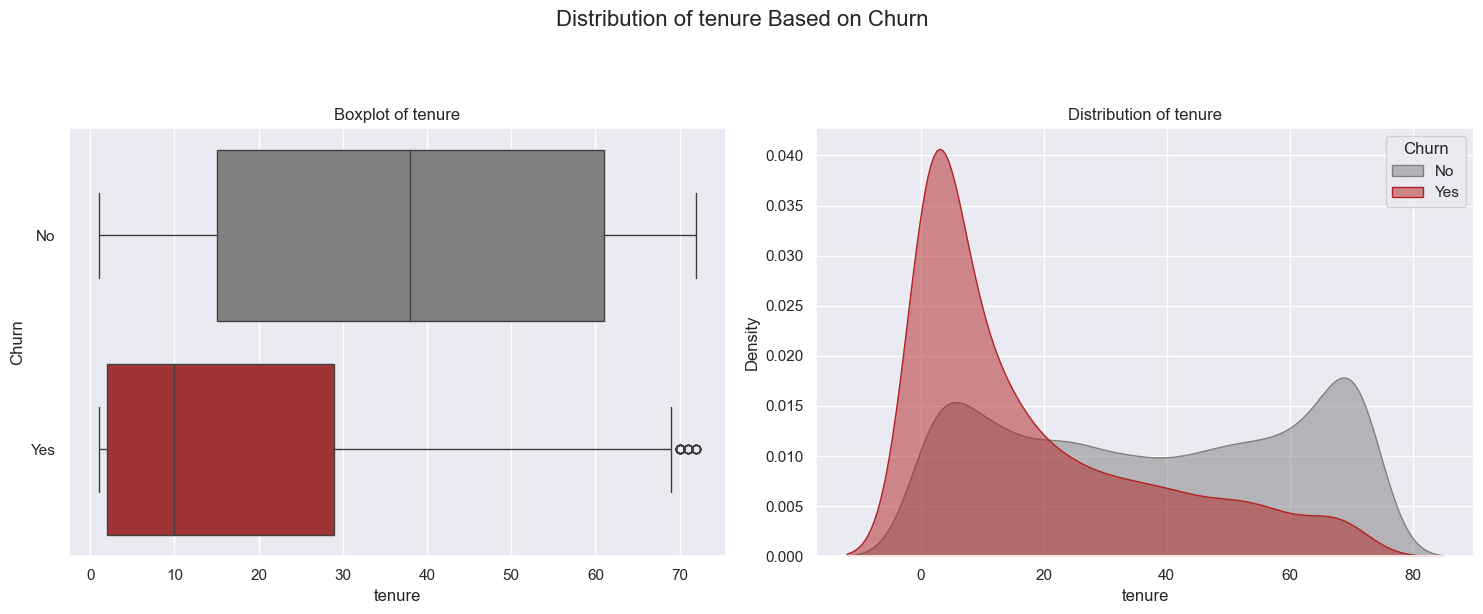

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0,46.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0,27.0


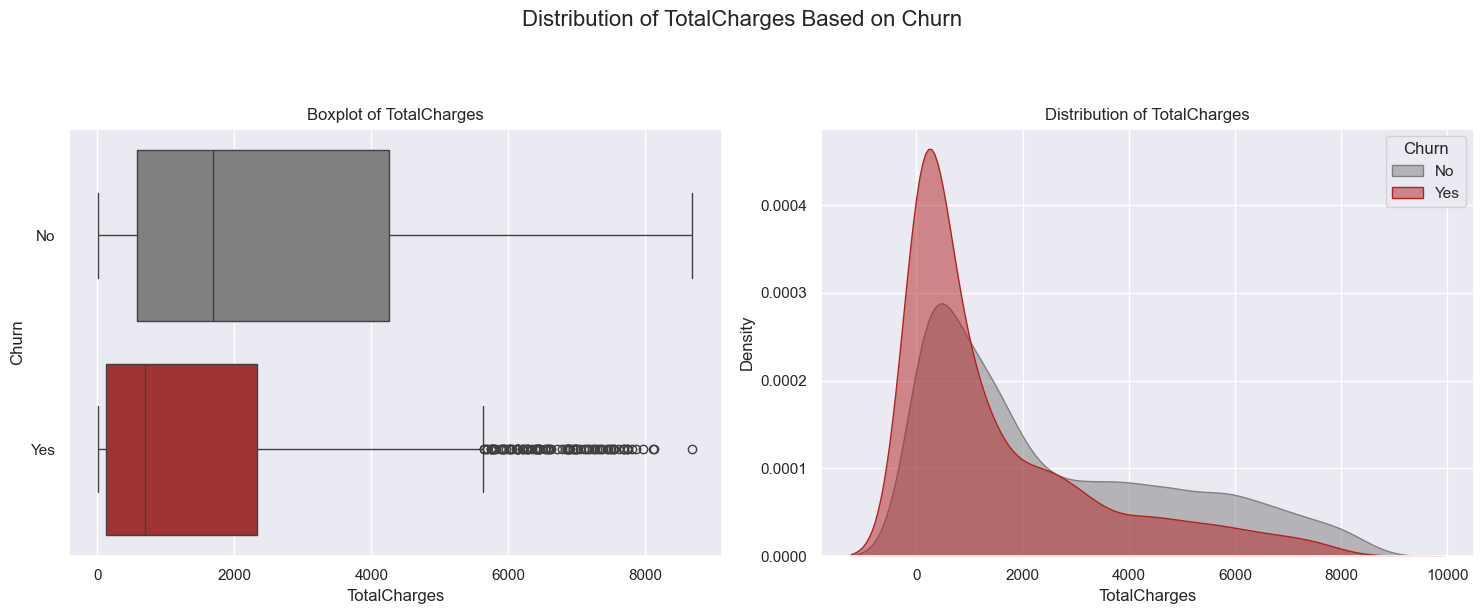

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45,3686.3
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80,2196.8


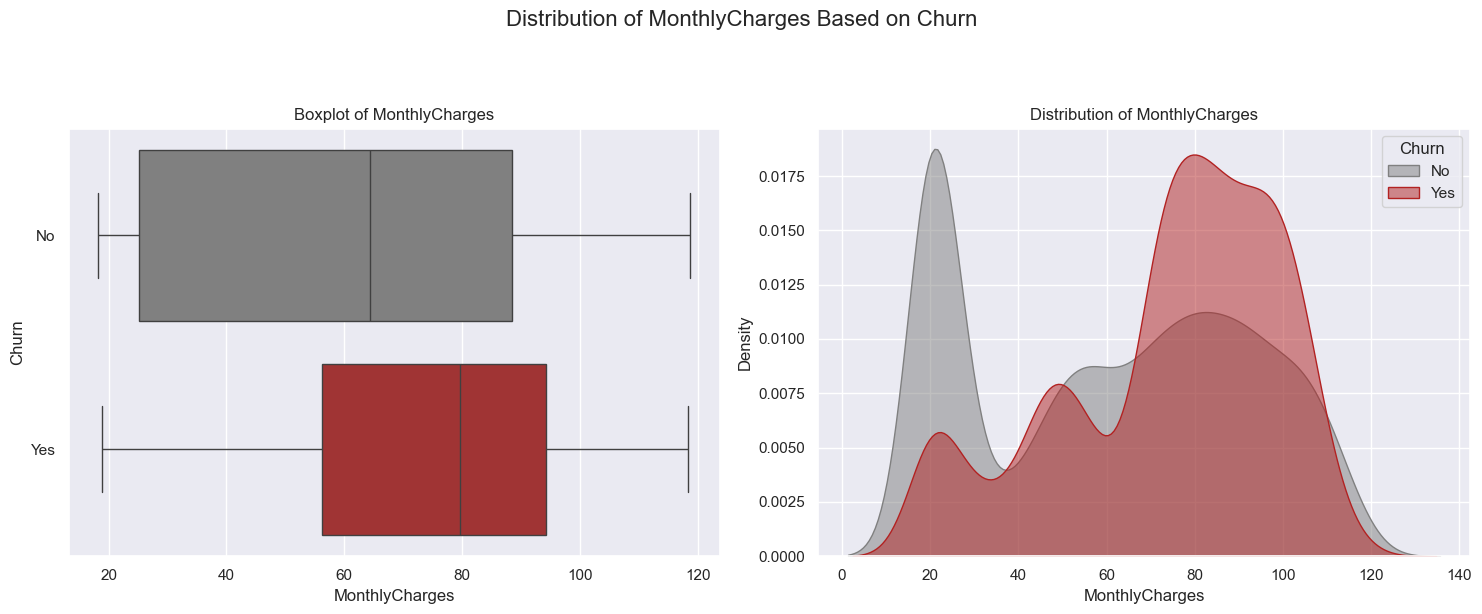

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75,63.375
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35,38.050


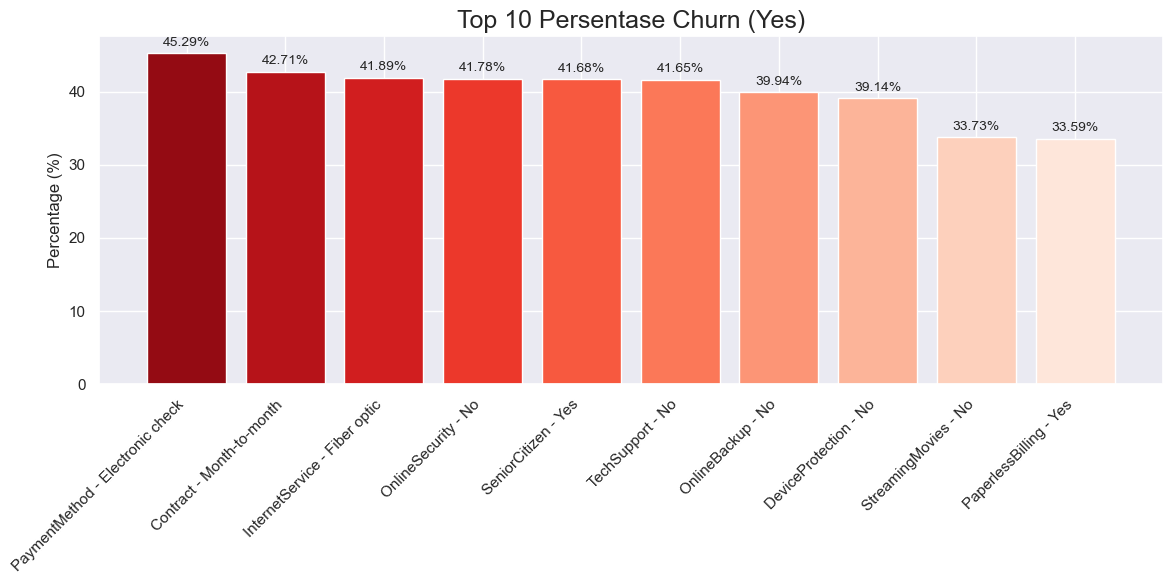

,Churn,Feature,Value,Count,Percentage
79,Yes,PaymentMethod,Electronic check,1071,45.29
69,Yes,Contract,Month-to-month,1655,42.71
27,Yes,InternetService,Fiber optic,1297,41.89
33,Yes,OnlineSecurity,No,1461,41.78
7,Yes,SeniorCitizen,Yes,476,41.68
51,Yes,TechSupport,No,1446,41.65
39,Yes,OnlineBackup,No,1233,39.94
45,Yes,DeviceProtection,No,1211,39.14
63,Yes,StreamingMovies,No,938,33.73
75,Yes,PaperlessBilling,Yes,1400,33.59


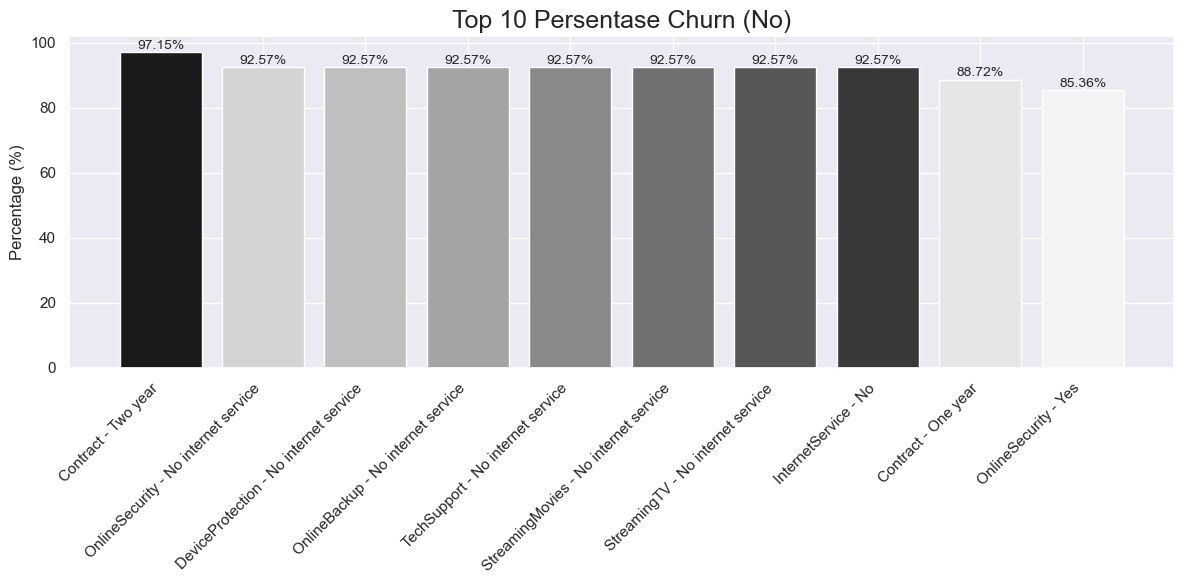

,Churn,Feature,Value,Count,Percentage
70,No,Contract,Two year,1637,97.15
36,No,OnlineSecurity,No internet service,1407,92.57
48,No,DeviceProtection,No internet service,1407,92.57
42,No,OnlineBackup,No internet service,1407,92.57
54,No,TechSupport,No internet service,1407,92.57
66,No,StreamingMovies,No internet service,1407,92.57
60,No,StreamingTV,No internet service,1407,92.57
30,No,InternetService,No,1407,92.57
72,No,Contract,One year,1306,88.72
34,No,OnlineSecurity,Yes,1720,85.36


In [59]:
plot_box_and_kde_churn(df, 'tenure')
plot_box_and_kde_churn(df, 'TotalCharges')
plot_box_and_kde_churn(df, 'MonthlyCharges')
prepare_churn_summary(df)
plot_churn_top10(final_yes_df, churn_status='Yes')
display(final_yes_df)
plot_churn_top10(final_no_df, churn_status='No')
display(final_no_df)

### 2.7 Business Conclusions

Analisis terhadap data historis menunjukkan adanya pola tertentu yang dapat mengindikasikan risiko pelanggan berhenti berlangganan (churn). Dengan memahami karakteristik ini, perusahaan dapat lebih tepat sasaran dalam menyusun strategi retensi. Berikut adalah ringkasan temuan utama berdasarkan fitur-fitur penting:

- **Pelanggan churn umumnya memiliki masa langganan yang singkat**  
  Median lama berlangganan pelanggan churn hanya **10 bulan**, jauh lebih rendah dibanding pelanggan yang tetap bertahan (**38 bulan**). Hal ini mengindikasikan bahwa churn umumnya terjadi di awal masa keanggotaan.

- **Jumlah total yang dibayarkan oleh pelanggan churn cenderung lebih rendah**  
  Meskipun pelanggan churn memiliki tagihan bulanan yang lebih tinggi (**$79 vs. $64**), total yang mereka bayarkan selama menjadi pelanggan lebih kecil (**$703 vs. $1683**) karena berhenti dalam waktu singkat. Ini menunjukkan adanya potensi ketidakpuasan di fase awal langganan.

- **Kontrak bulanan dikaitkan dengan risiko churn yang tinggi**  
  Sekitar **43% pelanggan churn** menggunakan kontrak bulanan (month-to-month), yang menawarkan fleksibilitas tinggi namun juga membuat pelanggan lebih mudah untuk berhenti kapan saja.

- **Metode pembayaran ‘Electronic Check’ paling sering digunakan oleh pelanggan yang churn**  
  Hampir **45% dari pelanggan churn** menggunakan metode ini. Dibandingkan dengan metode otomatis seperti auto-debit, pembayaran manual berpotensi meningkatkan risiko churn karena lebih rentan terhadap keterlambatan atau niat berhenti.

- **Kurangnya penggunaan layanan tambahan meningkatkan risiko churn**  
  Pelanggan yang tidak menggunakan fitur seperti OnlineSecurity atau TechSupport lebih sering churn. Hal ini menunjukkan bahwa tambahan layanan dapat meningkatkan persepsi nilai terhadap produk.

- **Pengguna layanan Fiber Optic cenderung lebih banyak yang churn dibandingkan pengguna DSL**  
  Meskipun secara teknis lebih cepat, pengguna Fiber Optic menunjukkan tingkat churn yang lebih tinggi. Kemungkinan disebabkan oleh ekspektasi layanan yang tidak sebanding dengan biaya.

- **Kelompok demografis tertentu lebih rentan terhadap churn**  
  Pelanggan lansia, yang tidak memiliki pasangan atau tanggungan, serta yang memilih sistem tagihan digital (paperless billing), cenderung memiliki tingkat churn lebih tinggi. Ini menunjukkan bahwa pendekatan personal dan dukungan emosional mungkin lebih dibutuhkan untuk segmen ini.

Sehingga, pelanggan yang cenderung Churn memiliki karakteristik sebagai berikut :
- Masa langganan pendek (median: 10 bulan)
- TotalCharges rendah (median: $703.55)
- MonthlyCharges tinggi (median: $79.65)
- Kontrak bulanan / month-to-month (43%)
- Pembayaran dengan Electronic Check (45%)
- Tidak menggunakan OnlineSecurity (42%), TechSupport (42%), OnlineBackup (40%), DeviceProtection (39%)
- Menggunakan layanan Fiber Optic (42%)
- Senior citizen (42%)
- Tanpa pasangan (33%), tanpa dependents (31%)
- Menggunakan paperless billing (34%)

Sedangkan, pelanggan yang Cenderung bertahan memiliki karakteristik sebagai berikut:
- Masa langganan panjang (median: 38 bulan)
- TotalCharges tinggi (median: $1683.60)
- MonthlyCharges lebih rendah (median: $64.45)
- Kontrak 2 tahun (97%) atau 1 tahun (89%)
- Pembayaran otomatis: Credit Card (85%), Bank Transfer (83%)
- Menggunakan OnlineSecurity (85%), TechSupport (85%), OnlineBackup (78%), DeviceProtection (77%)
- Menghindari paperless billing (84%)
- Memiliki pasangan (80%), memiliki dependents (84%)
- Bukan senior citizen (76%)



### 2.8 Business Recommendations

Analisis churn yang dilakukan menunjukkan bahwa faktor-faktor seperti durasi berlangganan (tenure), jenis kontrak, metode pembayaran, serta penggunaan layanan tambahan sangat memengaruhi keputusan pelanggan untuk berhenti. Berdasarkan pola data historis dan visualisasi top churn drivers, berikut adalah rekomendasi strategis yang dapat diterapkan untuk mengurangi churn dan meningkatkan loyalitas pelanggan:

- **Fokus pada pelanggan baru di 12 bulan pertama**  
  Pelanggan dengan tenure rendah memiliki tingkat churn yang sangat tinggi. Untuk itu, penting membangun program onboarding yang efektif, disertai insentif seperti diskon atau loyalty bonus di bulan ke-6 agar mereka lebih termotivasi untuk bertahan.

- **Sesuaikan tarif bulanan bagi pelanggan rentan di awal masa langganan**  
  Pelanggan churn cenderung memiliki monthly charges yang tinggi di awal. Perusahaan dapat menerapkan model harga dinamis seperti “semakin lama berlangganan, semakin hemat”, yang memberikan potongan bertahap seiring meningkatnya tenure.

- **Dorong migrasi ke kontrak jangka panjang**  
  Kontrak bulanan sangat berkorelasi dengan churn. Berikan promo atau cashback untuk pelanggan yang bersedia beralih ke kontrak tahunan atau dua tahunan. Misalnya, diskon 10% dari total charges jika mereka upgrade paket.

- **Alihkan metode pembayaran dari Electronic Check ke sistem otomatis**  
  Metode pembayaran ‘Electronic Check’ mendominasi pelanggan churn. Tawarkan insentif seperti potongan harga $5 untuk pelanggan yang beralih ke auto-debit atau kartu kredit selama 3 bulan pertama.

- **Bundling layanan keamanan sebagai nilai tambah**  
  Layanan seperti TechSupport dan OnlineSecurity terbukti mampu menekan churn. Tambahkan layanan ini secara gratis di awal (3 bulan pertama) untuk meningkatkan nilai layanan di mata pelanggan.

- **Targetkan segmen pelanggan rentan dengan pendekatan berbeda**  
  Pelanggan yang berstatus lansia, tinggal sendiri, atau tidak memiliki tanggungan cenderung lebih mudah churn. Ciptakan pendekatan personal seperti customer care khusus atau penawaran emosional yang menyentuh sisi kebutuhan mereka.

- **Evaluasi ulang value proposition dari layanan Fiber Optic**  
  Fiber optic sering dikaitkan dengan churn meskipun secara teknologi unggul. Lakukan edukasi nilai tambah melalui perbandingan langsung dengan DSL, baik dari segi kecepatan, stabilitas, maupun efisiensi biaya jangka panjang.

### 2.9 Save Dataset

In [60]:
df.to_csv('../Data/telco_data_eda.csv', index=False)